**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Mentoría MUMUKI
## **"Predicción de deserción en una plataforma educativa para aprender a programar".**

### Mentor

- Bulgarelli, Franco Leonardo

### Integrantes

- Finzi, Nadia
- Gherra C., Estefanía Inés
- Primo, Eugenia


## Primera Entrega:

El objetivo de esta entrega es la caracterización del lote de datos utilizando métricas estadísticas básicas, cálculo y visualización de la distribución de soluciones según diferentes parámetros que caractericen el recorrido tanto general del curso como de cada estudiante.

# **Pregunta Objetivo: _¿qué factores inciden en la deserción?_**


Algunas cuestiones para familiarizarnos e indagar en la pregunta objetivo son:

## A - Exploración y Caracterización del Dataset






In [1]:
# Librerías y configuraciones generales

# Esenciales
import pandas as pd
import numpy as np
from datetime import datetime, date, time, timedelta
import calendar

# Visualizacion
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn

# Varios
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Definición de funciones y procedimientos propios

def graficar_boxplot(dataframe, columna, aclaracion_titulo, label_x, pie_grafico):
  fig = plt.figure(figsize=(8, 6))
  g = seaborn.boxenplot(data=dataframe, x= columna, color='salmon')
  plt.title('Boxplot de la variable ' + columna + aclaracion_titulo, fontsize=14, weight='bold')
  plt.ylabel("")
  plt.xlabel("\n" + label_x, fontsize=10)
  plt.annotate( pie_grafico, xy=(0.3, -0.25), xycoords='axes fraction', ha='right', va='center', fontsize=12)

In [3]:
# Apertura del dataset desde Google Drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

def connect_to_drive():
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  return GoogleDrive(gauth)

def read_csv_from_drive(drive, id, filename):
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile(filename)  
  return pd.read_csv(filename)

drive = connect_to_drive()  # utilización de la función de apertura de archivos desde drive
df_submissions_0 = read_csv_from_drive(drive, '1oqeKaq164fYieUs6WODv53tF4hl7QY9N', 'df_submissions_python.csv') # el 2° parámetro es el id del archivo (terminación del link en drive)

# 1oqeKaq164fYieUs6WODv53tF4hl7QY9N
# [Fuente: https://colab.research.google.com/drive/1bPwYa_uumNJ7N6NazqSwLr-8dmiCaIj8]


### **1 - ¿Qué tamaño tiene el data set?**

In [4]:
print("Tamaño del dataset (filas, columnas):", df_submissions_0.shape)

Tamaño del dataset (filas, columnas): (47183, 13)


In [5]:
# Primeras filas del dataset 
df_submissions_0.head(8)

,exercise_eid,exercise_name,expectation_results,feedback,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results
0,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,0,76,def mitad(numero):\r\n return numero / 2,2019-08-30 13:17:17.700,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass..."
1,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,1,77,def mitad(numero):\r\n return numero / 2,2019-09-04 01:29:22.351,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass..."
2,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,2,78,def Mitas(numero):\r\n return 2 / numero\r\n,2019-09-04 02:53:01.099,failed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'fail..."
3,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,3,78,def Mitas(numero):\r\n return numero / 2\r\n,2019-09-04 02:53:24.673,failed,1,"[{'title': 'Mitad de 10 es 5', 'status': 'fail..."
4,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,4,78,def mitad (numero):\r\n return numero / 2\r\n,2019-09-04 02:53:41.949,passed,2,"[{'title': 'Mitad de 10 es 5', 'status': 'pass..."
5,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,5,79,def mitad(numero):\r\n return numero/2,2019-09-05 14:24:31.797,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass..."
6,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,6,80,def doble(numero):\r\n return 2 * numero\r\n,2019-09-23 12:21:30.215,failed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'fail..."
7,1,"Funciones, declaración",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,"File ""solucion.py"", line 8\n def doble(50...",7,80,def doble(50):\r\n return 2 / 50\r\n\r\n,2019-09-23 12:22:29.885,errored,1,[]


*Observaciones*:

En esta pequeña muestra de filas, se obervan por ejemplo tres envíos de soluciones diferentes (sid) del estudiante número "78" (student_uid), en la guía "python funciones tip..." (guide_slug) del "ejercicio 1" (excersise_eid). 

Dos de las tres soluciones tuvieron "falla" (submission_status = failed), y una "pasó" ok (submission_status = passed).

### **2 - Variables - Análisis general**

En esta sección se explorará a un alto nivel el dataset, para saber cómo se estructura y cómo se relaciona con la plataforma de Mumuki.

**2 -1. ¿Qué variables hay en el dataset (columnas originales)?**

In [6]:
print( "Las", len(df_submissions_0.columns), "variables originales del dataset son: ", list(df_submissions_0.columns))

Las 13 variables originales del dataset son:  ['exercise_eid', 'exercise_name', 'expectation_results', 'feedback', 'guide_slug', 'result', 'sid', 'student_uid', 'submission_content', 'submission_created_at', 'submission_status', 'submissions_count', 'test_results']


**2 -2. Panorama general de las variables en su formato original de carga:**

In [7]:
df_submissions_0.describe(include= "all")

,exercise_eid,exercise_name,expectation_results,feedback,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results
count,47183.000000,47183,47183,0.0,47183,15602,47183.000000,47183.000000,41459,47183,47183,47183.000000,41663
unique,NaN,46,337,NaN,3,9181,NaN,NaN,32937,47175,6,NaN,2780
top,NaN,"Palabras, sólo palabras",[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,"File ""solucion.py"", line 11\n else:\n ...",NaN,NaN,0:3:4,2020-07-15 05:04:11.989,failed,NaN,[]
freq,NaN,2610,30332,NaN,23961,78,NaN,NaN,252,2,17609,NaN,15605
mean,8.589450,NaN,NaN,NaN,NaN,NaN,18412.829155,221.765000,NaN,NaN,NaN,6.763538,NaN
std,4.897098,NaN,NaN,NaN,NaN,NaN,13146.120096,74.852459,NaN,NaN,NaN,11.002089,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,0.000000,NaN
25%,4.000000,NaN,NaN,NaN,NaN,NaN,6287.500000,161.000000,NaN,NaN,NaN,0.000000,NaN
50%,8.000000,NaN,NaN,NaN,NaN,NaN,18092.000000,223.000000,NaN,NaN,NaN,3.000000,NaN
75%,13.000000,NaN,NaN,NaN,NaN,NaN,29895.500000,284.000000,NaN,NaN,NaN,8.000000,NaN


*Observarciones:*

- count: muestra el conteo de filas con datos no nulos, para cada columna, en todo el dataframe (recordar que hay 47.183 filas en total, para tomar dimensión de los nulos de cada columna).

- Para columnas con datos tipo "string":
  - unique: cantidad de valores únicos (o supuestas categorías)
  - top: moda
  - freq: frecuencia de la moda
- Para columnas con datos tipo "numérico":
  - Estadísticas descriptivas (mean, std, min, q25, q50, q75, max)

*IMPORTANTE*:

1- Python no sabe cuáles son variables categóricas codificadas, y en estos casos puede hacer cálculos sin sentido empírico/estadístico. 

2- Incluso en las variables cuantitativas puede ser necesario hacer transformaciones extra para que sean representativas de algo empíricamente (lo cual se realiza más adelante).

*CONCLUSIÓN*

Se observa básicamente que la mayoría de las variables (columnas) del dataframe están cargadas como string, es decir las analizaremos para trabajarlas como categóricas nominales (u ordinales según el caso)

Entre las que tienen números, sólo `'submissions_count'` y `'submission_created_at'` son realmente numéricas  (discreta y continua, respectivamente) desde el punto de vista estadístico y empírico. Pero se las analizará y transformará más adelante, para que contribuyan al entendimiento de la información.

**2 -3. ¿Cómo se relacionan las variables "teóricamente" desde su definción?**

(de acuedo a las explicaciones recibidas previamente por parte de quien domina el campo de conocimiento -mentor-)

En la siguiente imagen se representan mediante flechas y formas las relaciones teóricas entre las variables, y se detallan las categorías de algunas de ellas. 

En círculos se señala el nombre original de cada una de las variables del dataset.

**Esquema de relaciones entre las variables del dataset (bordes rojos), y posibles ejemplos de "envíos".**
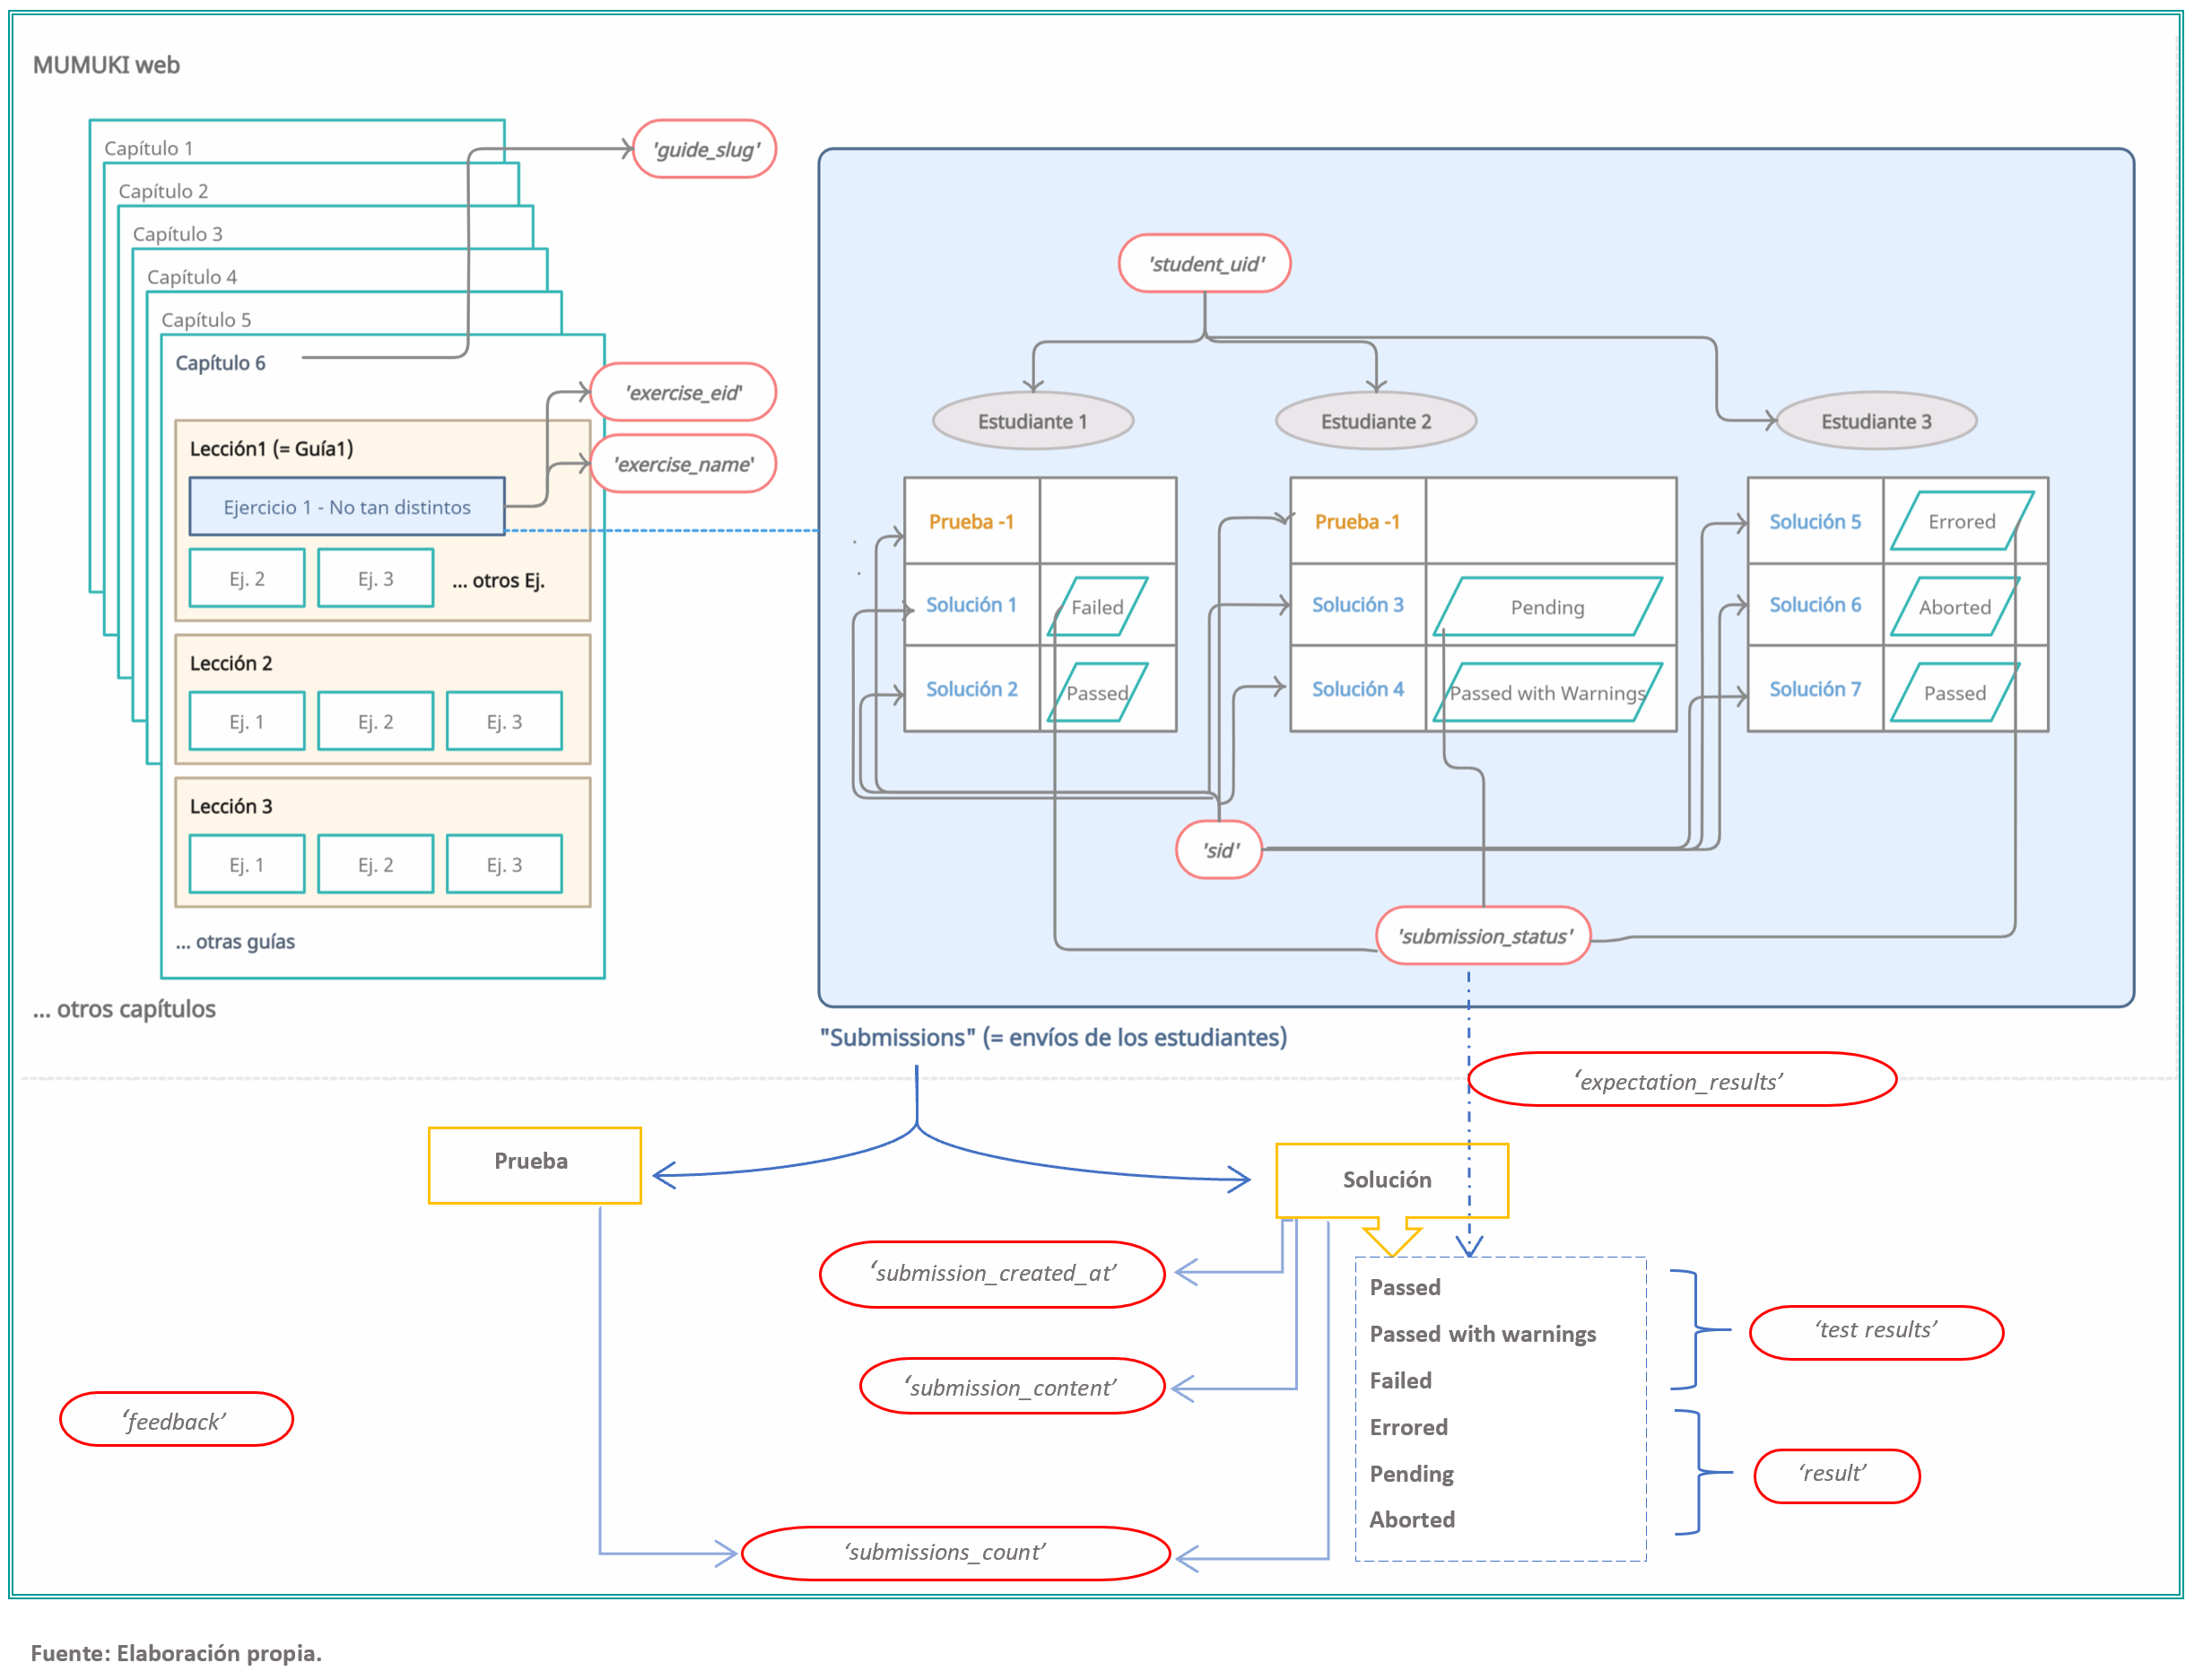

El esquema es una síntesis de las relaciones entre variables, y también simula un ejemplo de envío de soluciones y sus posibles estados.

La comprensión del mismo será incremental, a medida que se avance con las explicaciones y la exploración del dataset desarrollada en las secciones siguientes.

Tal como se observa en el esquema, la plataforma se estructura en:

**CAPÍTULOS**:

  1; 2; 3 ... etc.
	
Dentro de cada capítulo encontramos 

**GUÍAS**:

1.1 ;  1.2  ; 1.3 ... etc.

Y dentro de cada guía encontramos

**EJERCICIOS**:

1.1.1  ; 1.2.2  ; 1.2.3 ... etc.

L@s estudiantes realizarán "submissions (= envíos) que pueden ser tipo "prueba" o "solución". Sólo las soluciones pasan por un proceso de corrección o evaluación y adquieren distintos status según su resultado.

**Veamos la estructura de la plataforma mediante imágenes tomadas de la misma:**

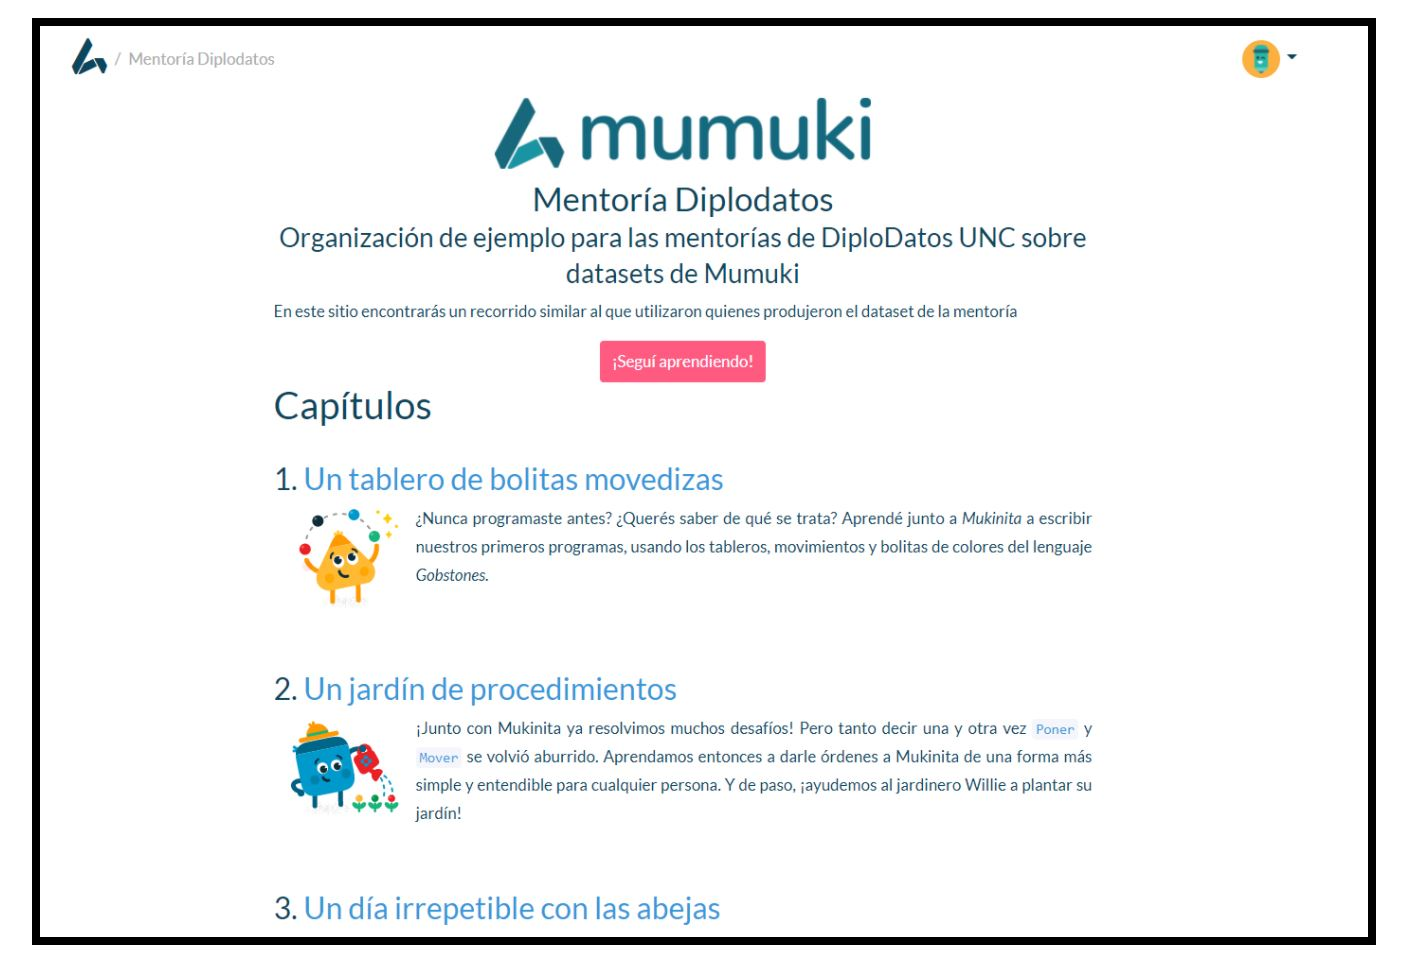

Debajo se observa la desagregación del Capítulo 1 en sus respectivas Lecciones.

Y la desagregación de las lecciones (guías), en Ejercicios:

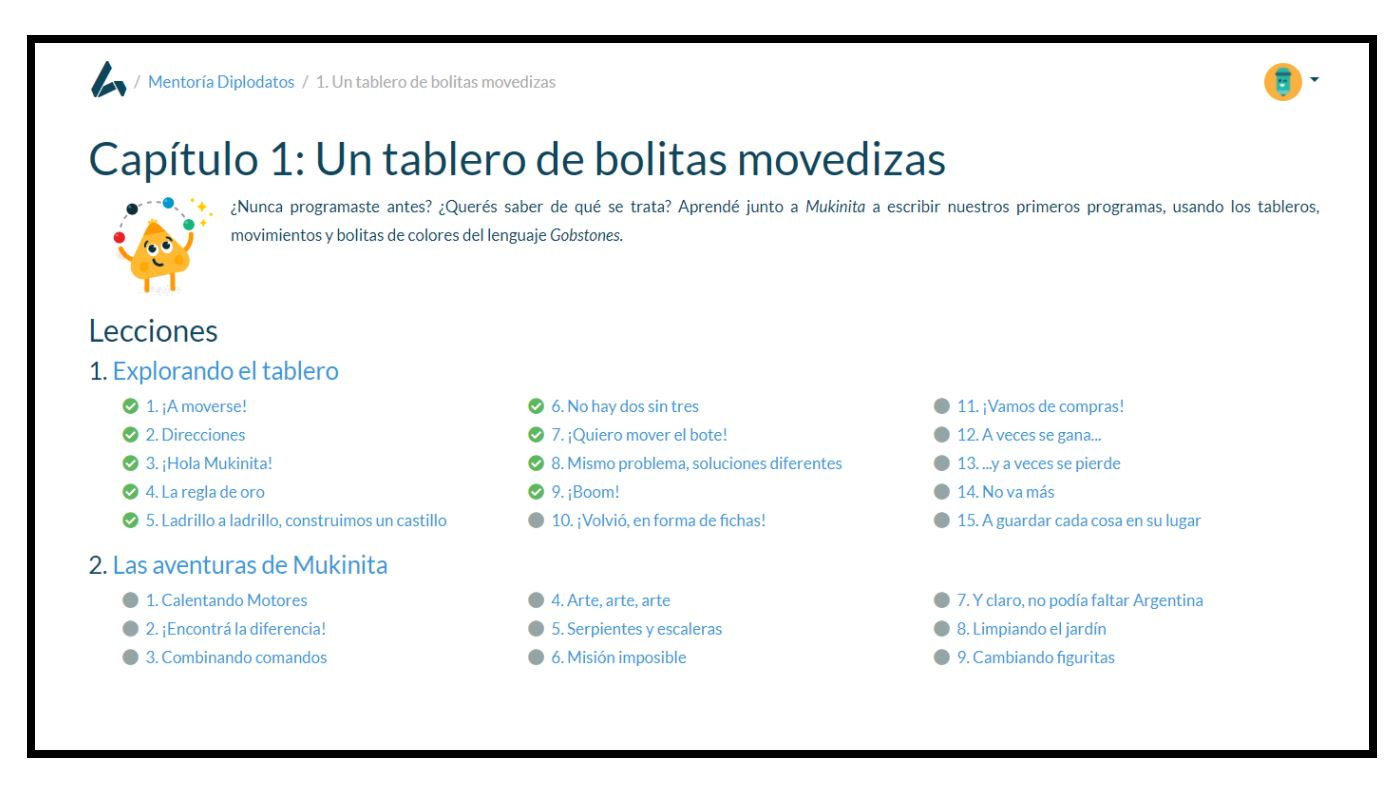

De forma análoga, la imagen siguiente muestra lo mismo para el Capítulo 6.

*Notar: Se lo presenta porque el dataset de este trabajo, se limita pedagógicamente para la mentoría, a guías y ejercicios de este capítulo*.

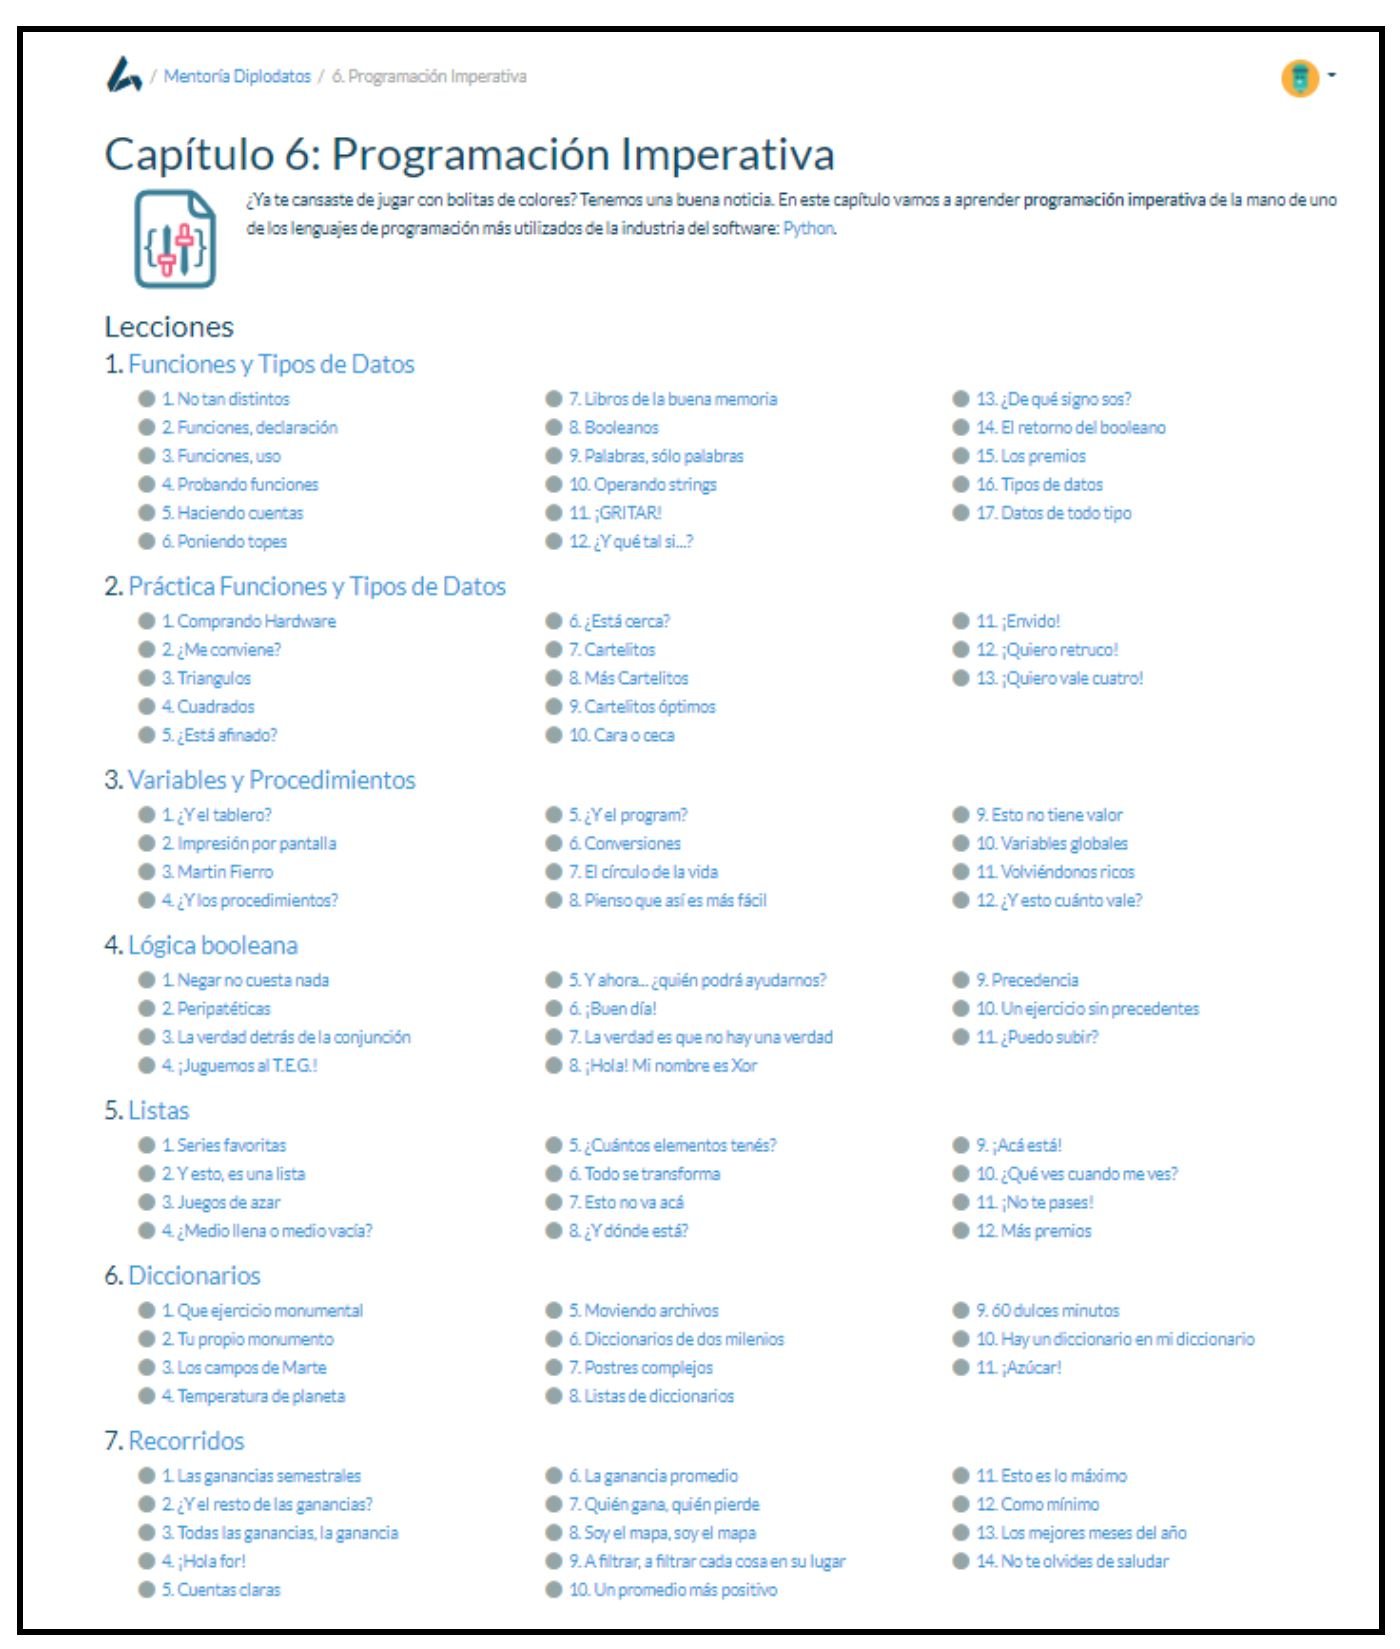

### **3 - Variables - Análisis particular**

En esta sección apuntamos a indagar y responder: 

¿Cómo se definen las variables? 

¿Qué valores únicos hay en las "categóricas" (nominales u ordinales)?

¿Cuáles son las estadísticas descriptivas de las variables "cuantitativas" (discretas o continuas)?

¿Necesitamos transformarlas para orientarnos a la resolución de nuestra pregunta general?

Se presentan las variables "organizadas" por lo que representan, y en algunos casos, respetando cierto nivel de desagregación categórica.

#### **3-1. Estudiantes**

**Variable `'student_uid'`:**

In [8]:
# Es el identificador (anonimizado) del estudiante -----------------------------=> Categórica Nominal (está codificada con números).

# Códigos únicos de estudiantes
print("códigos de student_uid: \n \n ", df_submissions_0['student_uid'].unique())
print("\n")

# Cantidad total de estudiantes
cant_alum = len(df_submissions_0["student_uid"].unique())
print( "cantidad total de estudiantes:", cant_alum)


códigos de student_uid: 
 
  [ 76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250  -1 251 252 253 254
 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272
 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290
 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308
 309 310 311 312 313 3

#### **3-2. Guías y Ejercicios**

**Variable `'guide_slug'`:**

In [9]:
# Es el identificador único de la guía, ---------------------------------------=> Categórica Ordinal
#                 (ya que las guías se ordenan por dificultad al menos desde la intención pedagógica).

# Permite buscarla en un repositorio Github o dentro del API de contenido de Mumuki 
# (por ejemplo la guía mumukiproject/mumuki-guia-python-funciones-tipos-de-datos 
# se corresponde con la URL https://bibliotheca-api.mumuki.io/guides/mumukiproject/mumuki-guia-python-funciones-tipos-de-datos). 
# El slug es la parte dentro de una URL o sitio web, que identifica a una página en concreto.
# Junto con el exercise_id constituyen la clave natural primaria del ejercicio.  

# Códigos únicos de guías
print("Identificadores de guías (guide_slug): \n \n ", df_submissions_0['guide_slug'].unique())
print("\n")

# Cantidad de guías
cant_gui = len(df_submissions_0["guide_slug"].unique())
print( "cantidad total de guías:", cant_gui)

Identificadores de guías (guide_slug): 
 
  ['mumukiproject/mumuki-guia-python-funciones-tipos-de-datos'
 'mumukiproject/mumuki-guia-python-practica-funciones-y-tipos-de-datos'
 'mumukiproject/mumuki-guia-python-variables-y-procedimientos']


cantidad total de guías: 3


*Observaciones*:

Hasta aquí vemos que en el dataset, tenemos envíos correspondientes a las primeras tres guías o lecciones del capítulo 6.

**Variable `'exercise_eid'`:**

In [10]:
# Identificador del ejercicio dentro de la guia -------------------------------=> Categórica Ordinal 
#                                                                          (está codificada, números) 
#                   (los ejercicios se ordenan por dificultad al menos desde la intención pedagógica).

# Códigos "únicos" de ejercicios
print("exercise_eid: ", df_submissions_0['exercise_eid'].unique())
print("\n")

# Cantidad de "códigos" de ejercicios
num_ejer = len(df_submissions_0["exercise_eid"].unique())
print( "cantidad de códigos de ejercicios:", num_ejer)

exercise_eid:  [ 1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 10]


cantidad de códigos de ejercicios: 19


*Observaciones:*

Como se aprecia arriba, hay 19 códigos de ejercicios. 

Sin embargo, debe recordarse que la identificación "única de ejercicios" es una combinación entre el nombre de la guía y el n° de ejercicio. 

Continuar con el análisis debajo:

**Variable `'exercise_name'`:**

In [11]:
# Nombre del ejercicio dentro de la guía --------------------------------------=> Categórica Nominal 
# (está como texto, sring).

# Nombres "únicos" de ejercicios
print("exercise_name: \n \n ", df_submissions_0['exercise_name'].unique())
print("\n")

# Cantidad de "nombres" de ejercicios
num_ejer_name = len(df_submissions_0["exercise_name"].unique())
print( "cantidad de nombres de ejercicios:", num_ejer_name)

exercise_name: 
 
  ['Funciones, declaración' 'Funciones, uso' 'Los premios' '¿Es par?'
 'Libros de la buena memoria' 'Tipos de datos' 'Booleanos' 'Más booleanos'
 'El retorno del booleano' 'Haciendo cuentas' 'Calefones'
 '¿Y qué tal si...?' '¿De qué signo sos?' 'Palabras, sólo palabras'
 'Operando strings' '¡GRITAR!' 'Probando funciones' 'Poniendo topes'
 'No tan distintos' 'Datos de todo tipo' 'Comprando Hardware'
 '¿Me conviene?' 'Triangulos' 'Cuadrados' '¿Está afinado?' 'Cartelitos'
 'Más Cartelitos' 'Cartelitos óptimos' 'Cara o ceca' '¡Envido!'
 '¡Quiero retruco!' '¡Quiero vale cuatro!' '¿Está cerca?' '¿Y el program?'
 'El círculo de la vida' 'Volviéndonos ricos' 'Variables globales'
 '¿Y los procedimientos?' '¿Y el tablero?' 'Impresión por pantalla'
 'Martin Fierro' 'Conversiones' '¿Y esto cuánto vale?'
 'PIenso que así es más fácil' 'Pienso que así es más fácil'
 'Esto no tiene valor']


cantidad de nombres de ejercicios: 46


*Observaciones:*

Aquí se observa que hay 46 "nombres" de ejercicios diferentes!. Sin embargo, vale la misma aclaración que para 'exercise_eid'. Entonces:

**¿Cuántos ejercicios únicos tenemos en "la muestra del dataset"?**

In [12]:
# Cantidad de ejercicios únicos en "el dataset", considerando la combinación "Guía" y "Ejercicio"

# Tabla para ver coherencia entre nombre y código de ejercicios.
guia_y_ejer = df_submissions_0.groupby(['guide_slug','exercise_eid'])['exercise_name'].nunique()
print("Tabla que muestra las frecuencias de 'Nombres de ejercicios', agrupados por número de ejercicio y nombre de la guía")
print("\n")
print(guia_y_ejer)
print("\n")

# Cantidad de ejercicios listados aparentemente como únicos
print ("Cantidad total de ejercicios únicos (combinación Guía & Ejercicio):", len( guia_y_ejer))

Tabla que muestra las frecuencias de 'Nombres de ejercicios', agrupados por número de ejercicio y nombre de la guía


guide_slug                                                            exercise_eid
mumukiproject/mumuki-guia-python-funciones-tipos-de-datos             1               1
                                                                      2               1
                                                                      3               1
                                                                      4               2
                                                                      5               1
                                                                      6               1
                                                                      7               2
                                                                      8               1
                                                                      9               1
       

*Observaciones:*

En la tabla de arriba se visualiza que, de no haber errrores, habría 43 "ejercicios únicos".

Sin embargo, en la columna de frecuencias (última), se observa que hay tres de estos ejercicios, que tendrían "dos nombres de ejercicio diferentes" para el mismo número de ejercicio y guía (en principio esto es una incoherencia).

**Es necesario analizar a qué se debe esta incoherencia, para según eso decidir si se dejan los casos que abarcan, o no:**

1) Para el primer caso, (guide_slug= funciones-tipos-de-datos & exercise_eid= 4 ) en donde vemos que el ejercicio tiene dos nombres '**¿Es par?**' y '**Libros de la buena memoria**', debemos buscar dentro de la API cuál de dichos ejercicios se encuentra en la guia actualmente, y analizar si se trata de un cambio en los ejercicios en sí mismos (de forma tal que puedan considerarse como ejercicios únicos diferentes); o si abarcan el mismo contenido y solo se modificó su nombre. De darse la primera situación, ambos ejercicios deberian permanecer en el dataset con su correspondiente nombre (porque serían realmente distintos); mientras que de darse la seguna alternativa, en realidad serían un mismo ejercicio, y por lo tanto simplemente modificaríamos el nombre a uno de ellos.  

Si analizamos la url https://bibliotheca-api.mumuki.io/guides/mumukiproject/mumuki-guia-python-funciones-tipos-de-datos (a través de json viewer) vemos que el ejercicio que se encuentra en la guia actualmente es "Libros de la buena memoria" y su descripción plantea la creación de una función utilizando operadores (==, >=, >, <, <=). Mientras que, a partir de la variable `submission_content` en el dataset, podemos inferir que el ejercicio "¿Es par?" trata sobre la creación de una función que determine si un numero es par (numero % 2 == 0). Por lo tanto, los contenidos que abarcan estas funciones no serían iguales, y deberiamos considerar dichos ejercicios como distintos. En razón de lo explicado, ambos permaneceran en el dataset.  

2) Para el segundo caso, (guide_slug= funciones-tipos-de-datos & exercise_eid= 7) en donde el ejercicio tiene el nombre '**Más booleanos**' y '**El retorno del booleano**', repetimos el mismo procedimiento anterior. En la API vemos que el que se encuentra actualmente en la guia es 'El retorno del booleano' y su descripción trata sobre la creción de una función que, de acuerdo a una serie de condiciones, debería devolver: si un numero, es (True), o no (False), de la suerte. Al analizar el ejercicio 'Más booleanos' en el dataset a partir de la variable `submission_content`, concluimos que parece ser bastante similar al ya descripto: definir con una función si un numero es de la suerte o no, a partir de ciertas condiciones. En este caso, suponemos que sólo hubo un cambio de nombre, y por lo tanto ambos se mantendrán en el dataset con el único nombre 'El retorno del booleano' (reemplazamos 'Más booleanos' por su nombre actual). 

3) Para el tercer y ultimo caso, (guide_slug= variables-y-procedimientos & exercise_eid= 13) en donde tenemos que un ejercicio tiene el nombre '**PIenso que así es más fácil**' y '**Pienso que así es más fácil**', parece que sólo es un error en el nombre. De todas maneras, se chequeó en la API y en el dataset, y vemos que efectivamente corresponden a un ejercicio muy similar que involucra el radio de un círculo. Supondremos entonces que son el mismo ejercicio y mantendremos en ambos el nombre 'Pienso que así es más fácil'. 


In [13]:
# Obtenemos los ejercicios que se encuentran con distinto nombre pero mismo identificador a partir de la tabla anterior: 
print(df_submissions_0[((df_submissions_0['guide_slug'] == "mumukiproject/mumuki-guia-python-funciones-tipos-de-datos") & (df_submissions_0['exercise_eid'] == 4))]["exercise_name"].unique()) 
print(df_submissions_0[((df_submissions_0['guide_slug'] == "mumukiproject/mumuki-guia-python-funciones-tipos-de-datos") & (df_submissions_0['exercise_eid'] == 7))]["exercise_name"].unique())
print(df_submissions_0[((df_submissions_0['guide_slug'] == "mumukiproject/mumuki-guia-python-variables-y-procedimientos") & (df_submissions_0['exercise_eid'] == 13))]["exercise_name"].unique())

['¿Es par?' 'Libros de la buena memoria']
['Más booleanos' 'El retorno del booleano']
['PIenso que así es más fácil' 'Pienso que así es más fácil']


In [14]:
# Sólo debemos hacer modificaciones en el caso 2 y 3.
# Segundo caso: 
df_submissions_0["exercise_name"] = np.where(df_submissions_0["exercise_name"] == 'Más booleanos', 'El retorno del booleano' , df_submissions_0["exercise_name"])
# Tercer caso: 
df_submissions_0["exercise_name"] = np.where(df_submissions_0["exercise_name"] == 'PIenso que así es más fácil', 'Pienso que así es más fácil', df_submissions_0["exercise_name"])

Una vez analizados estos casos, se podria generar una nueva columna llamada `exercise_new_id` que contemple el orden de los ejercicios y que les asigne un identificar único a cada uno de ellos (contemplando incluso la combinación guía & ejercicio, en la numeración ascendente). 

Para realizar esto, buscamos en la página actual de Mumuki, los ejercicios correspondientes a las primeras tres guías (o lecciones) del capítulo 6, en el orden en el que se encuentran para poder asignarles un id. Vale destacar que se debe tener en cuenta el ejercicio "¿Es par?", ya que algun@s de l@s estudiantes lo han realizado. Por lo tanto, se lo añadirá a la lista de ejercicios actuales en una posición anterior a "Libros de la buena memoria". 

Una vez realizado el mapeo, se observa que la nueva variable tiene valores np.nan correspondientes al ejercicio "Calefones" ya que no se encuentra en la guía actualmente. En este caso, quitaremos el ejercicio del dataset.  

In [15]:
_orden_ejer = {"No tan distintos": 1, "Funciones, declaración": 2, "Funciones, uso": 3, "Probando funciones": 4, "Haciendo cuentas": 5, "Poniendo topes": 6, "¿Es par?": 7, "Libros de la buena memoria": 8, "Booleanos": 9, "Palabras, sólo palabras": 10, "Operando strings": 11, "¡GRITAR!": 12, "¿Y qué tal si...?":13, "¿De qué signo sos?": 14, "El retorno del booleano": 15, "Los premios": 16, "Tipos de datos": 17, "Datos de todo tipo": 18, 
        "Comprando Hardware": 19, "¿Me conviene?": 20, "Triangulos": 21, "Cuadrados": 22, "¿Está afinado?": 23, "¿Está cerca?": 24, "Cartelitos": 25, "Más Cartelitos": 26, "Cartelitos óptimos": 27, "Cara o ceca": 28, "¡Envido!": 29, "¡Quiero retruco!": 30, "¡Quiero vale cuatro!": 31,
        "¿Y el tablero?": 32, "Impresión por pantalla": 33, "Martin Fierro": 34, "¿Y los procedimientos?": 35, "¿Y el program?": 36, "Conversiones": 37, "El círculo de la vida": 38, "Pienso que así es más fácil": 39, "Esto no tiene valor": 40, "Variables globales": 41, "Volviéndonos ricos": 42, "¿Y esto cuánto vale?": 43}

# Mapeo del nombre de los ejercicios con su correspondiente orden dentro de la guía:
df_submissions_0["exercise_new_id"] = df_submissions_0["exercise_name"].map(_orden_ejer)


In [16]:
# Observamos valores de la nueva variable "exercise_new_id":
df_submissions_0["exercise_new_id"].unique()

array([ 2.,  3., 16.,  7.,  8., 17.,  9., 15.,  5., nan, 13., 14., 10.,
       11., 12.,  4.,  6.,  1., 18., 19., 20., 21., 22., 23., 25., 26.,
       27., 28., 29., 30., 31., 24., 36., 38., 42., 41., 35., 32., 33.,
       34., 37., 43., 39., 40.])

In [17]:
# ¿A qué ejercicio corresponde el valor nan? 
df_submissions_0[df_submissions_0["exercise_new_id"].isna()]["exercise_name"].unique()

array(['Calefones'], dtype=object)

In [18]:
# Eliminamos "Calefones": 
print("La cantidad de datos que perdemos es: ", len(df_submissions_0[df_submissions_0["exercise_name"] == "Calefones"]))
print("El porcentaje que representa sobre el total es de: ", 100* len(df_submissions_0[df_submissions_0["exercise_name"] == "Calefones"])/len(df_submissions_0), "%")

df_submissions_0 = df_submissions_0.drop(df_submissions_0[df_submissions_0["exercise_name"] == "Calefones"].index, axis = 0)

La cantidad de datos que perdemos es:  97
El porcentaje que representa sobre el total es de:  0.2055825191276519 %


In [19]:
df_submissions_0["exercise_new_id"] = df_submissions_0["exercise_new_id"].apply(lambda x: int(x))

In [20]:
print("A partir de aqui trabajamos con un dataset de tamaño: ", df_submissions_0.shape)

A partir de aqui trabajamos con un dataset de tamaño:  (47086, 14)


In [21]:
# En función de las modificaciones realizadas, obtenemos la cantidad de ejercicios únicos:
print ("Cantidad total de ejercicios únicos (combinación Guía & Ejercicio):", len(df_submissions_0["exercise_name"].unique()))

Cantidad total de ejercicios únicos (combinación Guía & Ejercicio): 43


*Conclusión:*

De acuerdo a las modificaciones realizadas, se cuenta en forma definitiva con 43 ejercicios únicos.

Una vez descubiertos y curados los "ejercicios únicos" del dataset, podemos responder a la pregunta:

**¿Hasta qué ejercicio máximo llega el dataset?**

Para verlo generamos debajo una tabla, que de forma análoga a la anterior (varias celdas arriba), muestra los ejercicios ordenados "según la dificultad planificada pedagógicamente".

**El último ejercicio visible en la tabla, es el que responde la pregunta.**

Como dato adicional, la última columna de la tabla muestra en este caso, la cantidad de envíos (de todo tipo) que registra cada ejercicio. Esto nos muestra una primera aproximación, a la distribución de soluciones enviadas por l@s estudiantes, para cada ejercicio.

In [22]:
guia_ejer_sol = df_submissions_0.groupby(['guide_slug','exercise_eid'])['sid'].count()
print(guia_ejer_sol)

guide_slug                                                            exercise_eid
mumukiproject/mumuki-guia-python-funciones-tipos-de-datos             1               1069
                                                                      2               1221
                                                                      3               1347
                                                                      4               1273
                                                                      5               1327
                                                                      6               1275
                                                                      7               1542
                                                                      8               1909
                                                                      11               956
                                                                      12              1553
       

En el gráfico siguiente se representa dicha distribución de envíos, pero enumerándolos de forma continua y secuencial a todos (eje X).

En dicho gráfico se observa que en algunos ejercicios la cantidad de envíos es mayor. Por ejemplo, el ejercicio 10 concentra la mayor cantidad de envios mientras que hacia el final del recorrido la cantidad de envios por ejercicio comienza a disminuir.

*Notar*: la tabla (anterior) y su gráfico (siguiente) contienen tanto envíos de prueba como soluciones; y dentro de estas últimas, contiene todo tipo de estado de solución (passed, passed with warnings, failed, etc.) -se explican estas categorías más abajo-.

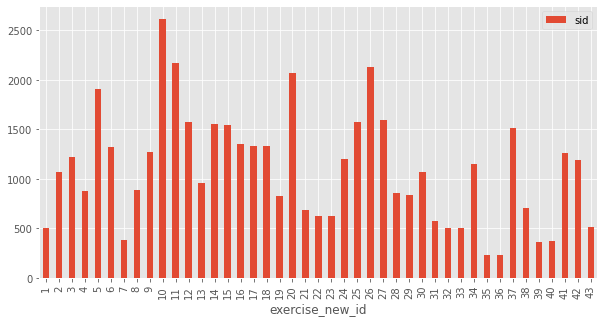

In [23]:
# Grafico de barras que representa la tabla anterior
envios_por_ejercicio = df_submissions_0.groupby('exercise_new_id')['sid'].count().reset_index().sort_values("exercise_new_id")
envios_por_ejercicio.plot.bar(x = "exercise_new_id", y = "sid", figsize = (10, 5))

#### **3-3. Envíos o "submissions"**

**Variable `'sid'`:**

In [24]:
# Identificador único del envío -----------------------------------------------=> Categórica Nominal 
#                                                                      (está codificada con números).

# es -1 si lo que se envió fue una prueba a través del REPL de Mumuki (consola) en lugar de una solución.
# es distinto de -1 si lo que se envió es una solución a un ejercicio.

# Códigos "únicos" de envíos
envios = df_submissions_0['sid'].unique()
print("códigos únicos de los envíos = sid: \n  \n ", envios)
print("\n")

# Cantidad de códigos únicos de envíos
print ("Cantidad total de códigos únicos de envíos:", len(envios))

códigos únicos de los envíos = sid: 
  
  [    0     1     2 ... 41698 41699 41700]


Cantidad total de códigos únicos de envíos: 41579


*Observaciones*:

Dentro de los envíos, hay varios que tienen el código -1, que son pruebas, y el resto que tienen todos códigos diferentes, que son las soluciones (no pruebas). 

Entonces, lo que interesa es saber:

**¿Cuántos envíos son prueba y cuántos envíos son soluciones, en todo el  dataset?**

Para responder a esto y brindar ciertos detalles, exploraremos ambos grupos por separado:

#### **3 -3.1. Envíos en consola o de "prueba"**

Por definición, estos "envíos de prueba" no son soluciones.

Por esa razón el sistema no le registraría "hora" de envío, "contenido o código fuente", ni "status" (ver representación en el esquema de la sección 1). 

A ellas tampoco se les asociarían "resultados esperados", y por ende, no serían evaluadas o corregidas por el sistema "mulang" (no resgistrarían ningún tipo de resultado). Observamos entonces: 

**¿Hay casos de prueba en el dataset?**

In [25]:
# Muestra de casos de "prueba" ("de consola") en el dataset (sid=-1)
is_prueba = df_submissions_0[df_submissions_0["sid"] == -1]
print("\n Muestra de 3 envíos de prueba \n  ")
is_prueba.head(3)


 Muestra de 3 envíos de prueba 
  


,exercise_eid,exercise_name,expectation_results,feedback,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results,exercise_new_id
4910,5,Tipos de datos,[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,-1,78,NaN,2019-09-04 16:17:52.996,passed,0,NaN,17
4911,5,Tipos de datos,[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,-1,77,NaN,2019-09-04 18:59:22.398,passed,0,NaN,17
4912,5,Tipos de datos,[],NaN,mumukiproject/mumuki-guia-python-funciones-tip...,NaN,-1,77,NaN,2019-09-04 18:59:40.300,passed,0,NaN,17


**Se observa que sí hay envíos de prueba en el dataset, y que las 
mismas totalizan (ver debajo):**

In [26]:
# Cantidad de envíos de Prueba
print ( "cantidad total de envíos de prueba o consola en el dataset:" , len(is_prueba))

cantidad total de envíos de prueba o consola en el dataset: 5508


In [27]:
# Verificamos que no hayan envíos "de consola" que tengan contenido guardado

df_submissions_0[(df_submissions_0["sid"] == -1) & (df_submissions_0["submission_content"].notna())]

,exercise_eid,exercise_name,expectation_results,feedback,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results,exercise_new_id


Se observa que se verifica lo establecido por "definición" en cuanto al contenido de estas filas de envíos de prueba.

#### **3 -3.2. Envío de "soluciones" (no son prueba)**

A diferencia de los envíos de prueba, los envíos de soluciones sí tienen registro en variables específicas de: contenido, hora de envío, status, y resultados.

Estos envíos de solución son analizados por mulang, aplicación que contrasta la sintaxis y el contenido del código, contra ciertos "resultados esperados" para ambos aspectos. 

De dicha evaluación se define: el "estado" de la solución (passed, passed with warnings, etc -se verá abajo-); y el registro de información que queda en la variable "result" o "test results" según corresponda -se verá más abajo-. (ver todo esto representado en el esquema de la sección 1).

Teniendo en cuenta esto,

**Se observa que la cantidad total de soluciones enviadas en el dataset es:**

In [28]:
# Cantidad de Soluciones (No pruebas)

isnot_prueba = df_submissions_0[df_submissions_0["sid"] != -1]
print ( "cantidad total de envíos de soluciones en el dataset:" , len(isnot_prueba))


cantidad total de envíos de soluciones en el dataset: 41578


##### **- Estado del envío de las soluciones**

**Variable `'submission_status'`:**

In [29]:
# Estado del envío ------------------------------------------------------------=> Categórica Ordinal (está como texto, string)

# Las categorías de esta variable significan:
# passed (solución correcta), 
# passed_with_warnigns (solución correcta desde el punto de vista de las pruebas unitarias pero con errores de mulang), 
# failed (solución que no pasa las pruebas unitarias), 
# errored (solución que no puede ser cargada por errores de sintaxis o referencias),
# pending 
# aborted (solución que puede ser cargada pero no puede ser ejecutada de forma completa, porque tarda demasiado tiempo, 
#     o tiene problemas de conexión, o hay problemas en la plataforma, o no se evaluó su contenido). 
#     (el problema aquí no se relaciona con el estudiante)

# Categorías únicas de estados de soluciones
estados = df_submissions_0['submission_status'].unique()
print("Posibles estados de las soluciones registrados en el dataset: \n \n ", estados )
print("\n")

# Cantidad de soluciones enviadas por categoría de estado:
estados_cat = isnot_prueba.groupby(['submission_status'])['sid'].count()
print( "Tabla de frecuencias de los estados de las soluciones enviadas \n \n" ,estados_cat, 
      " \n \n Total soluciones enviadas:", sum(estados_cat))

Posibles estados de las soluciones registrados en el dataset: 
 
  ['passed' 'failed' 'errored' 'passed_with_warnings' 'pending' 'aborted']


Tabla de frecuencias de los estados de las soluciones enviadas 
 
 submission_status
aborted                     3
errored                 15589
failed                  17531
passed                   8007
passed_with_warnings      439
pending                     9
Name: sid, dtype: int64  
 
 Total soluciones enviadas: 41578


*Observaciones*:

En la tabla de frecuencias anterior, se observa que del total de 41.578 soluciones enviadas, la mayoría fueron evaluadas con estado de error y falla (en conjunto son más de 32.000 en estos estados).

Mientras que 8.007 soluciones "pasaron ok" la evaluación, y 439 "pasaron con advertencias".

Las soluciones "aborted" y "pending" son insignificantes.

Estos resultados van en línea "general" con lo esperado: que l@s estudiantes se equivocan algunas veces, hasta pasar finalmente el ejercicio propuesto.

(Por supuesto esta es una primera aproximación, se observarán detalles más adelante).

##### **- Conteo del envío de las soluciones**

**Variable `'submissions_count'`:**

In [30]:
# La variable submissions_count -----------------------------------------------=> Numérica Discreta 

# necesita análisis y transformación, ya que es un conteo "acumulado" del envío de soluciones "previas" a la "actual"
# para cada combinación de estudiante, guía y ejercicio.

# Valores únicos de submissions_count
print("Valores únicos de la variable submissions_count: \n \n ", df_submissions_0['submissions_count'].unique())

Valores únicos de la variable submissions_count: 
 
  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144]


Esta variable `'submissions_count'` se analizará en detalle y se transformará en la sección 3-3.3; así como en el trabajo de las métricas de deserción.

No se presenta la cantidad de valores únicos, porque no tiene sentido empírico mostrarlo tal como está registrada.

##### **- Fecha del envío de las soluciones**

**Variable `'submission_created_at'`:**

In [31]:
# Fecha y hora GMT a la que la solución fue enviada ---------------------------=> Numérica Continua (Fechas y Horas/min/seg )
print(" Algunos valores de la variable submission_created_at: \n \n ", df_submissions_0['submission_created_at'].unique())

# Notar DATO: FECHA DE GENERACIÓN DEL LOTE O DATASET = MARZO DE 2021.

 Algunos valores de la variable submission_created_at: 
 
  ['2019-08-30 13:17:17.700' '2019-09-04 01:29:22.351'
 '2019-09-04 02:53:01.099' ... '2020-11-12 13:56:29.344'
 '2020-11-16 18:22:54.768' '2020-11-23 21:46:55.629']


Esta variable `'submission_created_at'` se analizará en detalle y transformará en la sección 3-3.4; así como en el trabajo de las métricas de deserción.

No se presenta la cantidad de valores únicos, porque no tiene sentido empírico mostrarlo tal como está registrada.

##### **- Resultados del envío de las soluciones, y otras variables**

Por el momento no se las analizará en detalle ya que tienen mucha información en string para analizar. Se las describirá brevemente desde su definición "teórica" recibida del mentor, y se mostrarán algunos de sus valores.


**Variable `'result'`:**

In [32]:
# result= Resutlado obtenido de soluciones que NO FUERON CARGADAS SATISFACTORIAMENTE 
# en un intérprete de Python debido a errores de sintaxis o referencias  -------------------=> Mucha info (está como string: ver)
# OJO: Si la solución fue cargada correctamente, no se asienta registro en ella => ver "test_results" 

print("result: \n \n ", df_submissions_0['result'].unique())
print("\n")

result: 
 
  [nan
 '  File "solucion.py", line 8\n    def doble(50):\n               ^\nSyntaxError: invalid syntax\n'
 '  File "solucion.py", line 8\n    def mitad(100) :\n                ^\nSyntaxError: invalid syntax\n'
 ...
 '  File "solucion.py", line 24\n    3.14159265358979=pi\n                      ^\nIndentationError: unindent does not match any outer indentation level\n'
 '  File "solucion.py", line 24\n    3.14159265358979 = pi\nSyntaxError: can\'t assign to literal\n'
 '  File "solucion.py", line 27\n    return 3.pi * 2 * radio \n              ^\nSyntaxError: invalid syntax\n']




**Variable `'test_results'`:**

In [33]:
# test_results= Resutlado obtenido de soluciones que SI FUERON CARGADAS SATISFACTORIAMENTE 
# en un intérprete de Python                                             -------------------=> Mucha info (está como string: ver)
# OJO: Sólo arroja resultados de las pruebas unitarias de soluciones que SI pudieron ser ejecutadas.

# Algunos valores de la variable
print("test_results: \n \n ", df_submissions_0['test_results'].unique())
print("\n")

test_results: 
 
  ["[{'title': 'Mitad de 10 es 5', 'status': 'passed', 'result': ''}, {'title': 'Mitad de 20 es 10', 'status': 'passed', 'result': ''}, {'title': 'Mitad de 2 es 1', 'status': 'passed', 'result': ''}]"
 '[{\'title\': \'Mitad de 10 es 5\', \'status\': \'failed\', \'result\': "NameError: global name \'mitad\' is not defined"}, {\'title\': \'Mitad de 20 es 10\', \'status\': \'failed\', \'result\': "NameError: global name \'mitad\' is not defined"}, {\'title\': \'Mitad de 2 es 1\', \'status\': \'failed\', \'result\': "NameError: global name \'mitad\' is not defined"}]'
 '[]' ...
 '[{\'title\': \'El area de un circulo de radio 0 es correcto\', \'status\': \'passed\', \'result\': \'\'}, {\'title\': \'El area de un circulo de radio 1 es correcto\', \'status\': \'passed\', \'result\': \'\'}, {\'title\': \'El area de un circulo de radio 2 es correcto\', \'status\': \'passed\', \'result\': \'\'}, {\'title\': \'El perimetro de un circulo de radio 0 es correcto\', \'status\': \'fai

**Variable `'submission_content'`:**

In [34]:
# Código fuente de la solución enviada ----------------------------------------=> Mucha info (está como string: ver)

# Algunos valores de la variable
print("submission_content: \n \n ", df_submissions_0['submission_content'].unique())
print("\n")

submission_content: 
 
  ['def mitad(numero):\r\n  return numero / 2'
 'def Mitas(numero):\r\n  return 2 / numero\r\n'
 'def Mitas(numero):\r\n  return numero / 2\r\n' ...
 'pi = 3.14159265358979\r\n\r\ndef perimetro_circulo(radio):\r\n  return 2 * pi * radio \r\n\r\ndef area_circulo(radio):\r\n  return  pi * radio * radio'
 'pi = 3.14159265358979\r\n\r\ndef perimetro_circulo (radio):\r\n  return pi * 2 * radio\r\ndef area_circulo (radio):\r\n  return pi * (radio * radio)'
 'pi = 3.14159265358979\r\n\r\ndef perimetro_cirulo(radio):\r\n  return radio*2*pi\r\ndef area_circulo(radio):\r\n  return pi*radio*radio']




**Variable `'expectation_results'`:**

In [35]:
# Resultados del análisis de expectativas y code smells 
# realizado mediante la herramienta mulang.    --------------------------------=> Mucha info (está como string: ver)

# se omite su "impresión en pantalla" por el momento, dado que ocupa mucho espacio y todavía no se la utiliza.
#print("expectation_results: ", df_submissions_0['expectation_results'].unique())  
#print("\n")

**Variable `'feedback'`:**

In [36]:
# Feedback --------------------------------------------------------------------=> Variable sin valores -> eliminar.

# Algunos valores de la variable
print("feedback: ", df_submissions_0['feedback'].unique())
print("\n")

feedback:  [nan]




In [37]:
df_submissions_0 = df_submissions_0.drop("feedback", axis = 1)

#### **3 -3.3 Análisis exploratorio de la variable `'submissions_count'` (conteo de envíos)**

Para profundizar en el entendimiento de la distribución de las soluciones enviadas, empezamos por graficar la columna en su "formato original", y también solicitamos sus estadísticas descriptivas (generales para todos los casos). 

Se insiste en que esto es una visión exploratoria, sin sentido empírico por el momento. Estamos tratando de dilucidar cómo funciona o carga los datos esta variable:

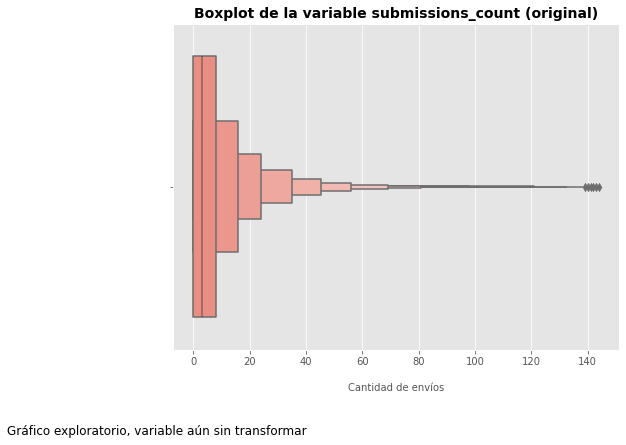

In [38]:
# Gráfico exploratorio inicial de la variable submission_count

graficar_boxplot(df_submissions_0, 'submissions_count', " (original)", "Cantidad de envíos", "Gráfico exploratorio, variable aún sin transformar")

In [39]:
# Estadísticas descriptivas de variable "submissions_count", general. 
# Variable original sin transformar.

df_submissions_0['submissions_count'].describe()

count    47086.00000
mean         6.76133
std         11.00812
min          0.00000
25%          0.00000
50%          3.00000
75%          8.00000
max        144.00000
Name: submissions_count, dtype: float64

**Como en realidad las filas del dataset registran distintos envíos para cada ESTUDIANTE, según GUÍA y número de EJERCICIO; la información anterior no nos sirve para entender la distribución de soluciones empíricamente.**

Por ello, procedemos a observar algunas de las características del "conteo de soluciones", agrupando `'submissions_count'`, por estudiante, guía y ejercicio (estamos buscando entender cómo funciona realmente esta variable, para luego poder transformarla de acuerdo a nuestro objetivo o pregunta principal).

In [40]:
# Estadísticas descriptivas de variable "submissions_count"
#  por estudiante, por guía/lección, y por ejercicio.

df_ed1 = df_submissions_0.groupby(['student_uid','guide_slug','exercise_eid'])['submissions_count'].describe()

In [41]:
df_ed1.head(10)

count  ...  max
student_uid guide_slug                                         exercise_eid         ...     
-1          mumukiproject/mumuki-guia-python-funciones-tipo... 1               3.0  ...  2.0
                                                               2               2.0  ...  1.0
                                                               3               1.0  ...  0.0
                                                               4               3.0  ...  2.0
                                                               5               4.0  ...  0.0
                                                               6               2.0  ...  1.0
                                                               7               1.0  ...  0.0
                                                               8               7.0  ...  0.0
                                                               11              3.0  ...  2.0
                                                               12              1.0  ...  0.0

[10 rows x 8 columns]

*Observaciones:*

Al ver en la tabla anterior que el "ejercicio 5" de la "guía funciones tipos de datos" para el estudiante "-1" cuenta "4 envíos"; y a la vez, el mismo renglón muestra en las estadísticas descriptivas que los valores calculados (mean, std, min, etc.) figuran en "0"; nos cuestionamos cómo funciona el recuento de envíos en esta variable `'submissions_count'`. 

Se procede a seleccionar los envíos del caso mencionado, para obtener una conclusión:

In [42]:
df_submissions_0[(df_submissions_0.student_uid == -1) & 
               (df_submissions_0.guide_slug == "mumukiproject/mumuki-guia-python-funciones-tipos-de-datos") & 
               (df_submissions_0.exercise_eid == 5)]

,exercise_eid,exercise_name,expectation_results,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results,exercise_new_id
5752,5,Tipos de datos,[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,-1,-1,NaN,2020-07-17 00:05:41.401,passed,0,NaN,17
5753,5,Tipos de datos,[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,-1,-1,NaN,2020-07-17 00:05:47.373,passed,0,NaN,17
5754,5,Tipos de datos,[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,-1,-1,NaN,2020-07-17 00:05:58.837,passed,0,NaN,17
5755,5,Tipos de datos,[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,-1,-1,NaN,2020-07-17 00:06:04.191,passed,0,NaN,17


Se aprecia que los envíos de ese caso son pruebas.

Procedemos a visualizar entonces todos los casos con valor "0" en `'submissions_count'`, para tratar de obtener una conclusión más general, consultar con quien domina el campo (mentor) y definir acciones posteriormente:

In [43]:
df_submissions_0[df_submissions_0["submissions_count"] == 0]

,exercise_eid,exercise_name,expectation_results,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results,exercise_new_id
0,1,"Funciones, declaración",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,0,76,def mitad(numero):\r\n return numero / 2,2019-08-30 13:17:17.700,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass...",2
1,1,"Funciones, declaración",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,1,77,def mitad(numero):\r\n return numero / 2,2019-09-04 01:29:22.351,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass...",2
2,1,"Funciones, declaración",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,2,78,def Mitas(numero):\r\n return 2 / numero\r\n,2019-09-04 02:53:01.099,failed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'fail...",2
5,1,"Funciones, declaración",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,5,79,def mitad(numero):\r\n return numero/2,2019-09-05 14:24:31.797,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass...",2
6,1,"Funciones, declaración",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,6,80,def doble(numero):\r\n return 2 * numero\r\n,2019-09-23 12:21:30.215,failed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'fail...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47178,14,Esto no tiene valor,[],mumukiproject/mumuki-guia-python-variables-y-p...,NaN,-1,348,NaN,2020-11-08 22:03:56.946,passed,0,NaN,40
47179,14,Esto no tiene valor,[],mumukiproject/mumuki-guia-python-variables-y-p...,NaN,-1,351,NaN,2020-11-12 11:10:08.054,passed,0,NaN,40
47180,14,Esto no tiene valor,[],mumukiproject/mumuki-guia-python-variables-y-p...,NaN,-1,316,NaN,2020-11-12 13:56:29.344,passed,0,NaN,40
47181,14,Esto no tiene valor,[],mumukiproject/mumuki-guia-python-variables-y-p...,NaN,-1,347,NaN,2020-11-16 18:22:54.768,passed,0,NaN,40


En esta tabla observamos que hay valores con `'submissions_count'`= 0 que tienen sid=-1 (son pruebas) y valores con `'submissions_count'`= 0 que NO son "pruebas". Y dado que nos interesan las soluciones (no pruebas), no podemos eliminar las filas con `'submissions_count'`= 0 porque eliminaríamos casos relevantes. Para poder guiarnos en la decisión al respecto:

Observamos con mayor detalle el recorte de una "tabla de frecuencias" de la variable `'submissions_count'`, agrupada por estudiante, guía y n° de ejercicio:

In [44]:
# Frecuencia absoluta de la variable "submissions_count", 
# agrupada por: estudiante, leccion/guía, ejericicio

df_freq1 = df_submissions_0.groupby(['student_uid','guide_slug','exercise_new_id'])['submissions_count'].value_counts()
df_freq1.head(30)

student_uid  guide_slug                                                 exercise_new_id  submissions_count
-1           mumukiproject/mumuki-guia-python-funciones-tipos-de-datos  1                0                    1
                                                                                         1                    1
                                                                                         2                    1
                                                                                         3                    1
                                                                                         4                    1
                                                                                         5                    1
                                                                                         6                    1
                                                                                         7                   

De todo esto, deducimos entonces que se presentarían dos casos:

- CASO 1) Donde `'submissions_count'`= 0, se presenta como valor único **para la combinación persona, guía y ejercicio**, y podría tratarse de envíos de "prueba" solamente (sobretodo si su freq es>1). O podría ser un único envío de solución, que no sería prueba (sobretodo si freq=1).

- CASO 2) Donde `'submissions_count'`= 0, se presenta junto con otros valores para la combinación persona, guía y ejercicio, de tal manera que se verán también valores de `'submissions_count'`>0 (1, 2 , 3 , etc.); todos ellos con freq=1.

Con todas esta información, consultamos y aclaramos nuestro entendimiento con el mentor, y arribamos a lo siguiente:

**CONCLUSIÓN 1:**

  **Los envíos del caso 2, serían soluciones efectivas (no pruebas). Si quisiéramos contar dichas soluciones, deberíamos calcular la cantidad ABSOLUTA DE ENVÍOS para esa "persona & guía & ejercicio" como el valor máximo asumido en la variable `'submissions_count'` + 1.**

**CONCLUSIÓN 2:**

Dado todo el análisis previo de variables y filas del dataset, y el análisis particular realizado sobre la variable `'submissions_count'`, vemos que las "pruebas" están afectando al conteo de envíos de soluciones.

Por ende, decidimos seleccionar (filtrar y quedarnos con) los envíos de "soluciones" efectivas para poder avanzar en el análisis y la posterior definición de métricas, orientadas a responder la pregunta objetivo general ¿Qué factores inciden en la deserción?.

**En otras palabras, se van a excluir del dataset los envíos que son "pruebas"; para:**

1) Mostrar debajo un gráfico boxplot y las estadísticas descriptivas de la distribución de la variable "cantidad de soluciones enviadas por estudiante".

2) Avanzar con el análisis específico de la variable numérica "fechas/horas de envío" (sección 3-3.4).

3) Proceder en los puntos B y C, a la definición y cálculo de métricas que clasifiquen a un@ estudiante en una de dos opciones: desertó, o no desertó.-

In [45]:
# Se filtran (excluyen por el momento) las pruebas: 
df_submissions = df_submissions_0[df_submissions_0["sid"] != -1]
print("Tamaño del dataset: ", df_submissions.shape)

Tamaño del dataset:  (41578, 13)


In [46]:
# Creamos una columna llamada "submissions_count_max": 
group_scmax = df_submissions.groupby(['student_uid','guide_slug','exercise_new_id'])["submissions_count"].max()
df_group_scmax = group_scmax.reset_index()
df_group_scmax["submissions_count_max"] = df_group_scmax["submissions_count"] + 1
df_group_scmax_1 = df_group_scmax[["student_uid", 'guide_slug','exercise_new_id',"submissions_count_max"]]

# Unimos la columna creada al dataset df_submissions: 
df_submissions = pd.merge(df_submissions, df_group_scmax_1, on = ["student_uid", 'guide_slug', 'exercise_new_id'], how = "left")

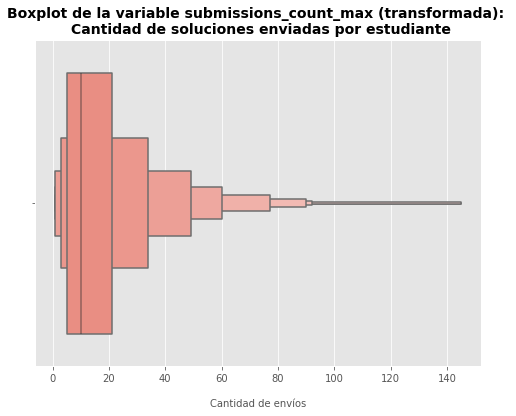

In [47]:
# Boxplot: distribución de la cantidad de soluciones (todas) enviadas por estudiante.

graficar_boxplot(df_submissions, 'submissions_count_max', ' (transformada): \n Cantidad de soluciones enviadas por estudiante', 'Cantidad de envíos', '')

In [48]:
# Estadísticas descriptivas de la cantidad de soluciones (todas) enviadas por estudiante.
df_submissions['submissions_count_max'].describe().round()

count    41578.0
mean        16.0
std         18.0
min          1.0
25%          5.0
50%         10.0
75%         21.0
max        145.0
Name: submissions_count_max, dtype: float64

En el boxplot y tabla precedentes, se observa que la variable "envíos de soluciones por parte de los estudiantes" está concentrada en los valores inferiores de su distribución: es asimétrica derecha. Se observa que la misma tiene una importante variabilidad en torno a su valor medio (ver debajo, coeficiente de variación= 110%). Y que por este motivo es mejor utilizar como medida de posición central la mediana (=10 envíos por estudiante). Considerando además, que el 50% de los datos centrales se concentran entre 5 y 21 envíos por estudiante; y que el mínimo de envíos fue 1 y el máximo fue 145 (outliers a tener en cuenta y analizar posteriormente).



In [49]:
print("coeficiente de variación del envío de soluciones:", df_submissions.submissions_count_max.std() / df_submissions.submissions_count_max.mean() *100)


coeficiente de variación del envío de soluciones: 110.62242576436286


#### **3 -3.4. Análisis de la variable `'submission_created_at'` (fecha y hora de envíos)**

**- Distribución de todas las soluciones enviadas, en todo el periodo de tiempo:**

Con el objetivo de observar ¿Durante qué período/s se enviaron las soluciones? (cuándo se usó la plataforma) ¿En qué dias de la semana? ¿Existe algún patrón en este sentido? Observamos:

In [50]:
# En primer lugar, obtenemos el periodo al que pertenecen l@s estudiantes para poder identificar los cursos: 
df_submissions["submission_created_at"] = pd.to_datetime(df_submissions['submission_created_at'])

    # Creamos una columna que sólo indique el año: 
df_submissions["año"] = df_submissions["submission_created_at"].dt.year
print("Años con registro de actividad:", df_submissions["año"].unique())

    # Creamos una columna que sólo indique el cuatrimestre: 
df_submissions["cuatrimestre"] = np.where(df_submissions["submission_created_at"].dt.month.isin([ 5,  6,  7, 8]), "2 cuatr.","3 cuatr.")
print("Cuatrimestres con registro de actividad:", df_submissions["cuatrimestre"].unique())

 # Creamos una columna que sólo indique el día:
dias = {0: "1-Lunes", 1: "2-Martes", 2: "3-Miércoles", 3: "4-Jueves", 4: "5-Viernes", 5: "6-Sábado", 6: "7-Domingo"}
df_submissions["dia"] = df_submissions["submission_created_at"].dt.dayofweek
df_submissions["dia"].replace(dias, inplace =True)
print("Cantidad de envíos por día:") 
print(df_submissions["dia"].value_counts())

Años con registro de actividad: [2019 2020]
Cuatrimestres con registro de actividad: ['2 cuatr.' '3 cuatr.']
Cantidad de envíos por día:
1-Lunes        9626
2-Martes       9500
5-Viernes      5050
4-Jueves       5003
3-Miércoles    4810
7-Domingo      4419
6-Sábado       3170
Name: dia, dtype: int64


Como se observa en los valores obtenidos, los envíos de soluciones corresponden a cohortes del año 2019 y 2020, del 2° y 3° cuatrimestre en ambos casos (esto se representa gráficamente en el gráfico de abajo).

Además, se observa en la tabla la distribución de frecuencia de envío de soluciones por días, totalizadas para los dos años y cuatrimestres en cuestión.

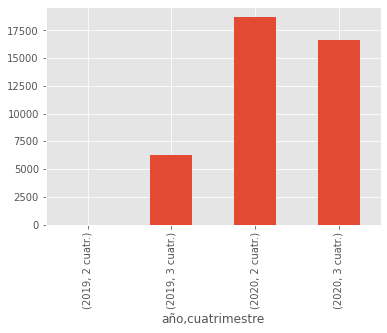

In [51]:
# Ambos periodos 2019 ; 2020, desagregados por cuatrimestres

df_submissions.groupby([df_submissions["año"], df_submissions["cuatrimestre"]]).sid.count().plot.bar()

Para contar con mayor "precisión" o detalle, se observa debajo la distribución de soluciones enviadas por año, cuatrimestre y días de la semana (podemos desagregar tamnbién por meses pero así ya vamos teniendo una aproximación).

Se observa en este gráfico que la mayoría de los datos corresponden al año 2020; motivo por el cual se realiza otro gráfico posteriormente, que incluye sólo dichos casos (con la intención de mejorar la visualización).

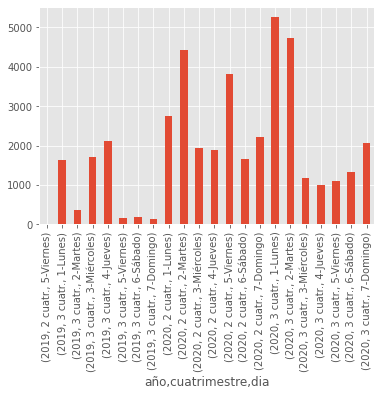

In [52]:
# Ambos periodos 2019 ; 2020, desagregados por cuatrimestres y días de la semana

df_submissions.groupby([df_submissions["año"], df_submissions["cuatrimestre"], df_submissions["dia"]]).sid.count().plot.bar()

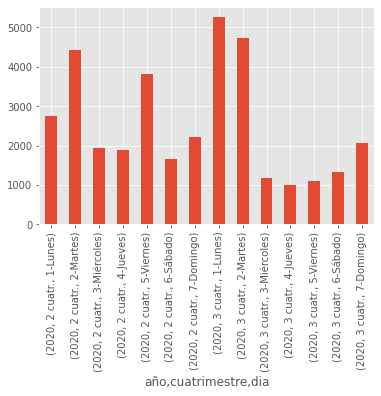

In [53]:
# Año 2020, desagregado por cuatrimestres 2° y 3°; y por días de la semana

df2020_submissions = df_submissions[df_submissions["año"] == 2020]
df2020_submissions.groupby([df_submissions["año"], df_submissions["cuatrimestre"], df_submissions["dia"]]).sid.count().plot.bar()

En el gráfico de arriba se destacan los días lunes y martes del 3er cuatrimestre del 2020, y los días martes y viernes del 2020 2° cuatrimestre.

**- Cálculo y distribución del Tiempo transcurrido entre la primera y última solución enviada por cada estudiante:**

Con el objetivo de observar ahora el tiempo transcurrido entre el primer y último envío de l@s estudiantes (rangos en meses y días para cada estudiante, considerando todos sus envíos), creamos las variables "rango_meses" y "rango_días":

In [54]:
# Cálculo del tiempo transcurrido entre el primer y último envío de solución por estudiante.
limites_fechas = df_submissions.groupby('student_uid').submission_created_at.agg(['min', 'max']).reset_index()
limites_fechas["rango_meses"] = (limites_fechas['max'] - limites_fechas['min'])/np.timedelta64(1, 'M')
limites_fechas["rango_dias"] = (limites_fechas['max'] - limites_fechas['min']).dt.days
limites_fechas.sort_values("rango_dias")

,student_uid,min,max,rango_meses,rango_dias
285,363,2020-10-06 14:16:50.664,2020-10-06 14:46:04.134,0.000667,0
163,237,2020-05-26 17:45:15.455,2020-05-26 18:21:13.880,0.000821,0
160,234,2020-05-26 10:20:48.411,2020-05-26 18:18:36.622,0.010902,0
159,233,2020-05-26 01:56:28.886,2020-05-26 23:42:13.616,0.029792,0
284,362,2019-10-17 14:35:27.705,2019-10-17 14:36:54.224,0.000033,0
...,...,...,...,...,...
245,319,2020-09-14 20:02:24.818,2020-11-21 15:17:26.661,2.227630,67
280,355,2020-05-26 14:11:01.786,2020-08-03 19:40:07.416,2.274496,69
186,260,2020-09-07 12:54:18.781,2020-11-23 20:15:28.657,2.539892,77
176,250,2020-07-15 00:20:53.522,2020-10-15 14:36:40.650,3.042175,92


En la tabla anterior se observan los datos de las variables creadas para cada estudiante, ordenados de mayor a menor rango. Si bien no vemos los 286 datos, ya se aprecia a simple vista: 
  - valores 0 en el rango de días de los primeros estudiantes (como si hubieran enviado soluciones en la plataforma en un periodo de tiempo menor a 24 horas), y luego hubieran "desertado(?)" -a definir-.
  - un estudiante que envió soluciones en un periodo de 366 días (esto es un outlier).

En las celdas siguientes se calculan las estadísticas descriptivas de ambas variables creadas, y el boxplot correspondiente a la variable "rango en días".

In [55]:
# Estadísticas descriptivas del tiempo transcurrido entre 1er y último envío de solución por estudiante.
limites_fechas.describe()

,student_uid,rango_meses,rango_dias
count,286.000000,286.000000,286.000000
mean,216.304196,0.715052,21.377622
std,83.389648,0.929630,28.269332
min,-1.000000,0.000000,0.000000
25%,145.250000,0.225422,6.000000
50%,216.500000,0.459578,13.500000
75%,287.750000,1.123652,34.000000
max,363.000000,12.029638,366.000000


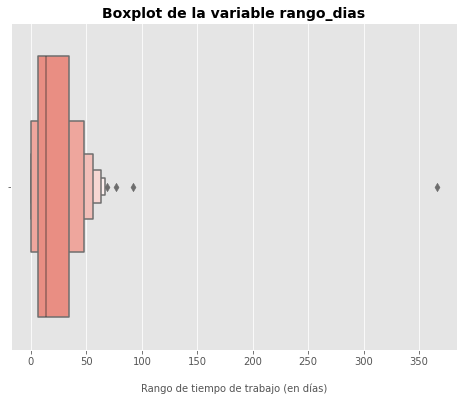

In [56]:
# Gráfico exploratorio de la variable generada rango_dias

graficar_boxplot(limites_fechas, 'rango_dias', '', 'Rango de tiempo de trabajo (en días)', '' )

En la tabla de estadísticas descriptivas vemos parte de lo ya descripto, en particular, que hay un 25% de los datos que se concentran en rangos que van de 0 a 6 días.

Como el valor de 0 días podría corresponder a personas que desertaron básicamente al principio, por el momento no eliminamos esos casos.

El valor de 366 días, como vimos y también se observa en el boxplot de arriba, es un outlier (por ejemplo, algún estudiante o profesor que tuvo acceso a la plataforma durante todo el año, y no sólo un cuatrimestre). Decidimos por el momento eliminar este caso atípico y único, y volvemos a graficar la distribución debajo.

Antes de continuar, observamos en la tabla y su boxplot (de arriba), que el 50% de los datos centrales se ubican en un rango que va desde los 6 a los 34 días, siendo el valor central (mediana) 13,5 días.

Como vemos, la media tiene un valor superior 21.3 y una desviación estándar grande (28) debido a la influencia en dichas cifras del outlier superior (que vamos a quitar).

Ahora sí, en las celdas siguientes generamos el boxplot y estadísticas descriptivas que resultan de esta curación.

(Vale notar que en la primera tabla de creación de estas variables de tiempo, se observó que el valor 92 sería el límite superior del rango calculado en días para esta muestra, si eliminamos el outlier; definimos entonces como límite superior de la variable el valor 100).



In [57]:
limites_fechas[limites_fechas.rango_dias < 100].rango_dias.max()

92

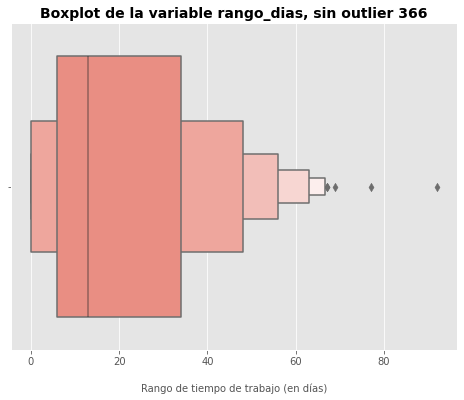

In [58]:
lim_fech_2 = limites_fechas[limites_fechas.rango_dias < 100]

# Gráfico exploratorio de la variable generada rango_dias 
# (distribución de "tiempo entre el primer y último ejercicio por estudiante, en días")

graficar_boxplot(lim_fech_2, 'rango_dias', ', sin outlier 366', 'Rango de tiempo de trabajo (en días)', '')

In [59]:
# Descriptivas de la distribución de "tiempo entre el primer y último ejercicio por estudiante, en días"

lim_fech_2.rango_dias.describe()

count    285.000000
mean      20.168421
std       19.552918
min        0.000000
25%        6.000000
50%       13.000000
75%       34.000000
max       92.000000
Name: rango_dias, dtype: float64

In [60]:
print("coeficiente de variación del rango en días:", lim_fech_2.rango_dias.std() / lim_fech_2.rango_dias.mean() *100)


coeficiente de variación del rango en días: 96.94818456483489


Con el boxplot y estadísticas descriptivas definitivas, igualmente observamos que la distribución es asimétrica derecha, y tiene una importante desviación en torno a su media (coef. de variación de rango en días = 96,95). 

Por este motivo, debemos advertir que si necesitamos una medida de posición central representativa, lo más conveniente sería utilizar la mediana.

## B - Nuevas preguntas y Definiciones de Métricas

# **Pregunta Objetivo: _¿qué factores inciden en la deserción?_**


Luego de la aproximación exploratoria, necesitamos:

### **1. Definir deserción con "métricas".**

    SÍNTESIS DE IDEAS O CONCEPTOS FINALES QUE SURGIERON:

- **Métricas basada en: CANTIDAD de ejercicios resueltos** 
        
        1.1 Deserta quien envía una "cantidad de ejercicios" MENOR a la "esperada", en "estado ok".
        
        Notar:
        - Tiempo= por el momento (fase exploratoria), vamos a observar la métrica en el periodo completo del dataset.
        - Valor esperado de la cantidad de ejercicios= podría ser el valor de la mediana de la distribución de envíos en estado ok (dado que vimos que la variable envíos de soluciones por estudiante es asimétrica).
        - En una fase posterior a la exploración, cuando se quiera predecir la deserción, deberíamos restringir el análisis de la métrica al primer mes de cursado de la cohorte.
      
- **Métricas basada en: TIEMPO de interacción en la plataforma**

        1.2 Deserta quien "interactúa" en la plataforma menor cantidad de tiempo, respecto al tiempo esperado, hasta cierta fecha "final".
      
        Notar: 
        - Por el momento (fase exploratoria), vamos a observar la distribución del tiempo de interacción en el periodo completo del dataset.
        - "fecha final"= si queremos pronosticar, la métrica luego deberá considerar un periodo menor al cursado total de un cuatrimestre (podría ser un mes desde el comienzo del cursado).
        - "interactuar"= implica medir el tiempo entre el primer y el último "envío" de la persona, para comprobar regularidad en el periodo de tiempo ventana de observación.   
        - A debatir: Por "envíos", se podría considerar cualquier "estado" de envío (si con esta métrica se busca ver la regularidad en la plataforma, y no que estén ok los ejercicios). 
        -> En realidad se podrían analizar las dos distribuciones de tiempo de interacción por separado (la de ejercicios ok vs. la de ejercicios con falla), para determinar cómo está inflenciada la métrica basada en tiempo/regularidad por el éxito/fracaso en los ejercicios.


- **Métricas basada en una COMBINACIÓN de Cantidad de ejercicios, Estado del envío y Tiempo de interacción (BONUS para fase posterior).**

      1.3 Deserta quien envía una "cantidad de ejercicios" MENOR a la "esperada", en "estado ok", en un "tiempo de interacción esperado".

        - A debatir: ¿L@s estudiantes, deben llegar a un determinado número de ejercicio específico o sólo importa la cantidad de ellos y no el número de ejercicio en sí? (En principio, pedagógicamente los ejercicios se colocan en un orden de dificultad incremental, pero l@s estudiantes no deben seguir necesariamente ese orden para avanzar). Esto se estudiará posteriormente.

### **2. Determinar ¿Quiénes desertaron según estas métricas?**

    OBTENER SEGÚN LAS MÉTRICAS Y CRITERIOS ESTABLECIDOS, UNA VARIABLE QUE IDENTIFIQUE L@S ESTUDIANTES QUE DESERTARON Y L@S QUE NO.

### **3. Observación.**

Durante el debate que finalizó en la postulación de las métricas definidas arriba, surgieron las preguntas que se detallan debajo:

    NUEVAS PREGUNTAS, EN RELACIÓN A POSIBLES FACTORES DE DESERCIÓN:

- **Fracaso vs Éxito en el envío de soluciones:** 
        
          - ¿En qué ejercicios se observa la mayor cantidad de fallas por estudiante?

          - ¿Cuántas fallas antes de abandonar el ejercicio tienen l@s estudiantes?


- **Falta de práctica:** 

          - ¿Podría impactar el hecho de hacer pruebas en consola en la retención/deserción?


- **Falta de disciplina o constancia:** 
         
          - ¿Hay algún patrón de alguna variable relacionada con la estructura de los envíos (tiempo, cantidad de envíos, otra), que se relacione con la retención/deserción?
         
          - ¿Qué diferencias se observan entre quienes desertan vs quienes no desertan?.


- **Dificultad de los ejercicios:** 

          - ¿Se observa una diferencia entre la intención didáctica de l@s profesores, y la experimentación de l@s estudiantes?

          - Con qué métrica/s podemos operacionalizar en el dataset esta idea (quizá con variable expectation_results?)



Por el momento no se dará respuesta a todas ellas en forma particular, pero se decide dejarlas registradas en este notebook, ya que guiaron la discusión inicial de métricas, y algunas quedaron pendientes o sujetas a una posible profundización posterior.

Se procede a la operativización de las métricas definidas:

## C - Cálculos y Operativización de las métricas en el Dataset

**Nuestra variable objetivo es la deserción de l@s estudiantes en la plataforma Mumuki.** 

Sin embargo, no contamos con ella en el dataset y, por lo tanto, la construiremos a partir de las métricas definidas globalmente en el punto anterior.

Para hacer ahora operativas las definiciones de B.1, necesitamos:


## C - 1. Calcular las siguientes nuevas variables/métricas:

  **1.1 Cantidad de ejercicios** *que cada persona* resolvió (variable numérica discreta).

  **1.2 Tiempo promedio** en *que cada persona* resolvió los ejercicios passed o passed with warning (variable numérica continua).

  **1.3 Cantidad de soluciones** *que cada persona* envió por ejercicio (variable numérica discreta).

  **1.4. Cantidad de personas** (estudiantes) que resolvieron "como último ejercicio" cada uno de los ejercicios del recorrido completo (variable numérica discreta) [esto supone ordenar los ejercicios según su nivel de dificultad, para observar hasta qué punto del recorrido llegó cada estudiante, y obtener así hasta dónde llegó la mayoría. La idea es poder deducir en qué ejercicios hubo mayor dificultad y posible deserción] 


## C - 2. Calcular la deserción:

- Con estas métricas posibles de calcular, obtenemos las etiquetas de deserción/permanencia para cada estudiante, al comparar el valor obtenido por cada un@ de ell@s en cada métrica, con un valor estándar central general (mediana, media, según corresponda).

- Es decir, se puede construir así una columna de 1 y 0 que indique la deserción o no de cada estudiante, respectivamente, para cada variable; y/o una columna única de deserción general, combinando con cierta ponderación cada una de las métricas definidas con anterioridad.


## C - 3. Observación:

- Para poder calcular todas estas métricas "solamente" para aquellas soluciones que entren en una ventana de tiempo pre-establecida (por ejemplo, 1 mes), hay que calcular para cada solución, el tiempo transcurrido desde la primera de todas las soluciones (las de la persona, en cualquier ejercicio) y luego filtar aquellas cuyo periodo fue menor a un mes. Recién luego de tener filtradas esas soluciones, se pueden empezar a calcular las métricas.

- Como esto es complicado, lo obviamos por el momento (trabajo futuro).

- **Pero calcularemos una métrica basada en el tiempo: cuánto tiempo le tomó a la persona hacer x% del recorrido total.**

- El bonus sería: calcular una variable de deserción compuesta. 


### **Métrica 1: cantidad de ejercicios resueltos por estudiante.** 

La variable que indica los ejercicios que realizó cada estudiante es `exercise_new_id`, pero aquí filtraremos por aquellos ejercicios que han sido aprobados (`passed`) o aprobados con alertas (`passed_with_warnings`).

In [61]:
# Por cada estudiante obtenemos la cantidad de ejercicios con status passed o passed_with_warnings que realizó:
filtro_status = df_submissions[(df_submissions["submission_status"] == "passed") | (df_submissions["submission_status"] == "passed_with_warnings")]
group_ejer = filtro_status[["student_uid", "exercise_new_id"]]
group_ejer = group_ejer.groupby(["student_uid"]).nunique().rename(columns = {'exercise_new_id': 'ejercicios_resueltos'})
group_ejer.head(20) 

,ejercicios_resueltos
student_uid,
-1,27
76,30
77,34
78,4
79,18
80,11
81,6
82,27
83,11


Se calculan las estadísticas descriptivas, un boxplot e histograma para analizar su distribución.

In [62]:
# Estadistica descriptiva de la columna "ejercicios_resueltos": 
group_ejer.describe()

,ejercicios_resueltos
count,280.000000
mean,27.221429
std,12.214081
min,1.000000
25%,20.250000
50%,34.000000
75%,36.000000
max,36.000000


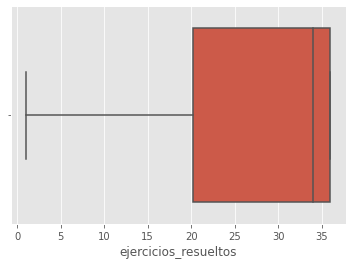

In [63]:
# Boxplot de la columna "ejercicios_resueltos":
seaborn.boxplot(group_ejer["ejercicios_resueltos"])

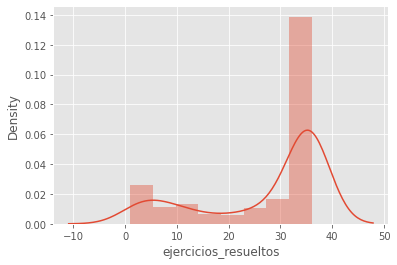

In [64]:
# Distribucion de la columna "ejercicios_resueltos":
seaborn.distplot(group_ejer["ejercicios_resueltos"])

El hecho de obtener estadisticas descriptivas de la variable cantidad de ejercicios resueltos por estudiante nos permite determinar la mejor regla de decisión para definir si la/el estudiante ha desertado o no. 

Vemos que la máxima cantidad de ejercicios que resuelve un estudiante es 36 y el mínimo 1. Además, el 50% central de l@s estudiante ha realizado entre 20 y 36 ejercicios.

Algo a destacar es que la distribución es asimétrica izquierda, concentrando la mayoría de sus valores en el extremo superior. En particular, se aprecia que el 50% de l@s estudiantes, hizo entre 34 y 36 ejercicios.

Dicho todo esto, es conveniente tomar a la mediana como punto de corte ya que es mas representativa de nuestros datos. 

Conclusión: la regla de decisión de esta métrica será: **si un@ estudiante ha resuelto menos ejercicios que la mediana, suponemos que ha desertado**. Se creará una columna llamada `cond_cant_ejer` que tendrá un 1, si de acuerdo a la regla de decisión el/la estudiante ha desertado, y un 0 si no lo hace. 

In [65]:
# Regla de decision: 
median_ejer = group_ejer["ejercicios_resueltos"].median()
median_ejer

34.0

In [66]:
# Creamos la columna de desercion:
df_cond_ejer = group_ejer.copy()
df_cond_ejer["cond_cant_ejer"] = np.where(df_cond_ejer["ejercicios_resueltos"] < median_ejer, 1, 0)
df_cond_ejer

,ejercicios_resueltos,cond_cant_ejer
student_uid,,
-1,27,1
76,30,1
77,34,0
78,4,1
79,18,1
...,...,...
353,36,0
355,3,1
358,1,1


Pero aqui tenemos a l@s estudiantes agrupados, por lo tanto, deberiamos configurar estas condiciones para que se apliquen al dataset original.

In [67]:
# Nos quedamos sólo con las variables id del estudiante y condición de deserción: 
df_group_ejer_1 = df_cond_ejer.reset_index() 
df_cond_ejer_1 = df_group_ejer_1[["student_uid", "cond_cant_ejer"]]

In [68]:
# Ahora nuestro dataset contiene la condición de deserción o no segun la métrica "cantidad de envios"
df_submissions = df_submissions.merge(df_cond_ejer_1, on = "student_uid", how = "outer")

In [69]:
df_submissions.head()

,exercise_eid,exercise_name,expectation_results,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results,exercise_new_id,submissions_count_max,año,cuatrimestre,dia,cond_cant_ejer
0,1,"Funciones, declaración",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,0,76,def mitad(numero):\r\n return numero / 2,2019-08-30 13:17:17.700,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass...",2,1,2019,2 cuatr.,5-Viernes,1.0
1,2,"Funciones, uso","[{'binding': 'anterior_del_triple', 'inspectio...",mumukiproject/mumuki-guia-python-funciones-tip...,NaN,1069,76,def anterior(numero):\r\n return numero - 1\r...,2019-08-30 13:40:26.023,failed,0,"[{'title': 'Anterior1 es 0', 'status': 'passed...",3,2,2019,2 cuatr.,5-Viernes,1.0
2,2,"Funciones, uso",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,1070,76,def anterior(numero):\r\n return numero - 1\r...,2019-09-10 20:00:32.156,passed,1,"[{'title': 'Anterior1 es 0', 'status': 'passed...",3,2,2019,3 cuatr.,2-Martes,1.0
3,3,Los premios,[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,2434,76,def medalla_segun_puesto(pos):\r\n if pos == ...,2019-09-26 19:35:23.737,passed,0,"[{'title': 'Medalla segun puesto 0', 'status':...",16,1,2019,3 cuatr.,4-Jueves,1.0
4,4,¿Es par?,[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,3681,76,def es_par(numero):\r\n return numero % 0 == 0,2019-09-10 20:08:45.875,failed,0,"[{'title': 'Es par 1 es falso', 'status': 'fai...",7,2,2019,3 cuatr.,2-Martes,1.0


### **Métrica 2: tiempo promedio de resolución de ejercicios "passed o passed with warnings" por estudiante.** 

La variable sobre la que basamos esta métrica es el tiempo promedio de resolución de ejercicios. Para ello, se debe considerar la cantidad de ejercicios resueltos por cada estudiante y el tiempo que tardó en enviar todas sus soluciones aprobadas. 

De esta manera obtenemos cuántos días tardó, en promedio cada estudiante, en resolver los ejercicios. 

La cantidad de ejercicios ha sido calculada en la métrica previa, y el rango de días será recalculado ya que, si bien se calculó en la sección 3-3.4, se le han realizado filtros al dataset en secciones posteriores, lo que hace que deba ser recalculada. 

In [70]:
filtro_status = df_submissions[(df_submissions["submission_status"] == "passed") | (df_submissions["submission_status"] == "passed_with_warnings")]
group_tiempo = filtro_status.groupby('student_uid').submission_created_at.agg(['min', 'max']).reset_index()
group_tiempo["rango_dias"] = (group_tiempo['max'] - group_tiempo['min']).dt.days
group_tiempo

,student_uid,min,max,rango_dias
0,-1,2020-07-15 16:20:33.827,2020-07-17 00:42:58.680,1
1,76,2019-08-30 13:17:17.700,2019-10-16 23:09:51.808,47
2,77,2019-09-04 01:29:22.351,2019-09-23 13:26:40.846,19
3,78,2019-09-04 02:53:41.949,2019-09-28 20:04:10.381,24
4,79,2019-09-05 14:24:31.797,2019-10-23 13:20:51.240,47
...,...,...,...,...
275,353,2020-11-23 20:59:40.861,2020-11-23 21:52:17.944,0
276,355,2020-05-26 14:11:01.786,2020-05-26 14:39:23.543,0
277,358,2020-05-16 18:50:49.407,2020-05-16 18:50:49.407,0
278,359,2020-05-14 22:42:31.975,2020-05-29 02:25:47.078,14


In [71]:
# Calculamos el tiempo promedio por ejercicio en la columna "tiempo_prom_ejer":
df_tiempo_prom = df_group_ejer_1.merge(group_tiempo, on = "student_uid", how = "left")
df_tiempo_prom["tiempo_prom_ejer"] = df_tiempo_prom["rango_dias"]/df_tiempo_prom["ejercicios_resueltos"]
df_tiempo_prom.head()

,student_uid,ejercicios_resueltos,cond_cant_ejer,min,max,rango_dias,tiempo_prom_ejer
0,-1,27,1,2020-07-15 16:20:33.827,2020-07-17 00:42:58.680,1,0.037037
1,76,30,1,2019-08-30 13:17:17.700,2019-10-16 23:09:51.808,47,1.566667
2,77,34,0,2019-09-04 01:29:22.351,2019-09-23 13:26:40.846,19,0.558824
3,78,4,1,2019-09-04 02:53:41.949,2019-09-28 20:04:10.381,24,6.000000
4,79,18,1,2019-09-05 14:24:31.797,2019-10-23 13:20:51.240,47,2.611111


In [72]:
df_tiempo_prom["tiempo_prom_ejer"].describe()

count    280.000000
mean       0.808860
std        1.410581
min        0.000000
25%        0.166667
50%        0.388889
75%        1.028186
max       13.666667
Name: tiempo_prom_ejer, dtype: float64

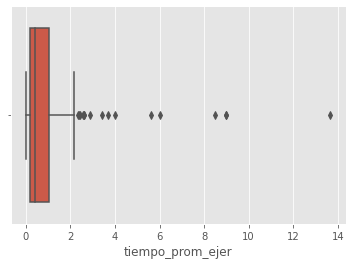

In [73]:
# Boxplot de la columna "tiempo_prom_ejer":
seaborn.boxplot(df_tiempo_prom["tiempo_prom_ejer"])

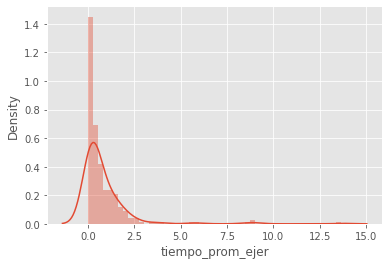

In [74]:
# Distribucion de la columna "tiempo_prom_ejer":
seaborn.distplot(df_tiempo_prom["tiempo_prom_ejer"])

El hecho de obtener estadisticas descriptivas de la variable tiempo promedio por ejercicio resuelto por estudiante, nos permite determinar la mejor regla de decisión para definir si la/el estudiante ha desertado o no. 

Vemos que la máxima cantidad de tiempo en que resuelve un estudiante es de 24 dias y el minimo de 0. Además, el 75% de los estudiante los ha resuelto en hasta 1.19 días. Se observa tanto en las estadísticas como en los gráficos la asimetría de la distribución.

Dicho esto, es conveniente tomar a la mediana como punto de corte ya que es mas representativa de nuestros datos (el promedio se vería afectado por los estudiantes que han tardado muchos dias en resolver los ejercicios, siendo que "la mayoría" los ha resuelto en 1 dia).

Por lo tanto, la regla de decisión de esta métrica será: **si la/el estudiante tarda más que la mediana en resolver sus ejercicios, suponemos que ha desertado**. Se creará una columna llamada `cond_tiempo_ejer` que tendrá un 1 si de acuerdo a la regla de decisión el/la estudiante ha desertado y un 0 si no lo hace.

In [75]:
# Regla de decisión: 
median_tiempo_ejer = df_tiempo_prom["tiempo_prom_ejer"].median()

In [76]:
# Creamos la columna de deserción:
df_cond_tiempo_ejer = df_tiempo_prom.copy()[["student_uid", "tiempo_prom_ejer"]]
df_cond_tiempo_ejer["cond_tiempo_ejer"] = np.where(df_cond_tiempo_ejer["tiempo_prom_ejer"] > median_tiempo_ejer, 1, 0)
df_cond_tiempo_ejer

,student_uid,tiempo_prom_ejer,cond_tiempo_ejer
0,-1,0.037037,0
1,76,1.566667,1
2,77,0.558824,1
3,78,6.000000,1
4,79,2.611111,1
...,...,...,...
275,353,0.000000,0
276,355,0.000000,0
277,358,0.000000,0
278,359,1.166667,1


Pero aqui tenemos a l@s estudiantes agrupados, por lo tanto, deberiamos configurar estas condiciones para que se apliquen al dataset original.


In [77]:
# Nos quedamos solo con las variables id del estudiante y condicion de deserción: 
df_cond_tiempo_ejer_1 = df_cond_tiempo_ejer[["student_uid", "cond_tiempo_ejer"]]

In [78]:
# Ahora nuestro dataset contiene la condicion de deserción o no según la condición "tiempo promedio por ejercicio"
df_submissions = df_submissions.merge(df_cond_tiempo_ejer_1, on = "student_uid", how = "outer")
df_submissions.head()

,exercise_eid,exercise_name,expectation_results,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results,exercise_new_id,submissions_count_max,año,cuatrimestre,dia,cond_cant_ejer,cond_tiempo_ejer
0,1,"Funciones, declaración",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,0,76,def mitad(numero):\r\n return numero / 2,2019-08-30 13:17:17.700,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass...",2,1,2019,2 cuatr.,5-Viernes,1.0,1.0
1,2,"Funciones, uso","[{'binding': 'anterior_del_triple', 'inspectio...",mumukiproject/mumuki-guia-python-funciones-tip...,NaN,1069,76,def anterior(numero):\r\n return numero - 1\r...,2019-08-30 13:40:26.023,failed,0,"[{'title': 'Anterior1 es 0', 'status': 'passed...",3,2,2019,2 cuatr.,5-Viernes,1.0,1.0
2,2,"Funciones, uso",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,1070,76,def anterior(numero):\r\n return numero - 1\r...,2019-09-10 20:00:32.156,passed,1,"[{'title': 'Anterior1 es 0', 'status': 'passed...",3,2,2019,3 cuatr.,2-Martes,1.0,1.0
3,3,Los premios,[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,2434,76,def medalla_segun_puesto(pos):\r\n if pos == ...,2019-09-26 19:35:23.737,passed,0,"[{'title': 'Medalla segun puesto 0', 'status':...",16,1,2019,3 cuatr.,4-Jueves,1.0,1.0
4,4,¿Es par?,[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,3681,76,def es_par(numero):\r\n return numero % 0 == 0,2019-09-10 20:08:45.875,failed,0,"[{'title': 'Es par 1 es falso', 'status': 'fai...",7,2,2019,3 cuatr.,2-Martes,1.0,1.0


### **Métrica 3: Cantidad de soluciones (de todo tipo, aprobadas o no) enviadas por estudiante**


Recordando que `df_submissions` contiene todas las soluciones enviadas por cada estudiante, sin considerar las pruebas en consola que podrían haber sido desde 0 hasta infinito (ya que son pruebas realizadas a criterio de cada estudiante y no son evaluadas), procedemos a calcular la cantidad de envíos realizó cada estudiante. 

Llamaremos a esta cantidad "`intentos`" debido a que no distingue si el envío en cuestión resolvió correctamente el ejercicio o no.

In [79]:
envios_por_estudiante = df_submissions.groupby("student_uid").sid.count().reset_index().rename(columns = {"sid": "intentos"})
envios_por_estudiante

,student_uid,intentos
0,-1,58
1,75,1
2,76,62
3,77,127
4,78,66
...,...,...
281,358,6
282,359,31
283,361,1
284,362,3


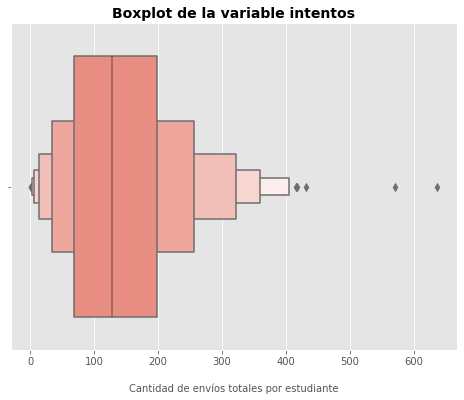

In [80]:
# Gráfico exploratorio de la cantidad de intentos/envíos de cada estudiante

graficar_boxplot(envios_por_estudiante, 'intentos', '', 'Cantidad de envíos totales por estudiante', '')

In [81]:
# Estadísticas descriptivas de intentos/envíos por estudiante

envios_por_estudiante.intentos.describe()

count    286.000000
mean     145.377622
std      103.419521
min        1.000000
25%       67.750000
50%      128.000000
75%      198.000000
max      636.000000
Name: intentos, dtype: float64

Tanto en el gráfico como en la tabla anteriores, vemos que la cantidad de intentos totales varía entre 1 y 636, teniendo una media de 128 intentos. 

Recordando que hay 43 ejercicios, de los cuales resolvieron correctamente 36 como máximo, eso significaría un promedio de 3,55 intentos por ejercicio. 

El problema es que no tod@s resolvieron la misma cantidad de ejercicios, por lo que aparecen los siguientes escenarios:

* podrían haber estudiantes con pocos ejercicios resueltos y:
  * pocos intentos (deserción temprana)
  * muchos intentos (deserción tardía)
* podrían haber estudiantes con muchos ejercicios resueltos y:
  * pocos intentos (resolución sin problema de los ejercicios)
  * muchos intentos (resolución con dificultad pero avanzando igual)

Sumado a esto, cada ejercicio suma al menos un intento, por lo que el número en crudo se desvirtúa aún más; ya de entrada, quienes más ejercicios resuelvan, mayor número de intentos tendrán. 

Por lo tanto, este número en crudo nos serviría únicamente para identificar a aquell@s estudiantes que resolvieron MUY poco y que no estuvieron ni cerca de lo esperado. Pero esto mismo se visualiza con mayor facilidad en las métricas 1 y 4 (sabiendo qué cantidad de ejercicios debían resolver, ver cuántos hicieron o hasta dónde llegaron). 

Por eso, esto nos obliga a **continuar el análisis desagregando por ejercicio** y, para entender mejor dónde se generan los problemas, **contabilizando específicamente los intentos fallidos**. 


In [82]:
filtro_fallidos = df_submissions[~df_submissions.submission_status.isin(['passed', 'passed_with_warnings'])]

In [83]:
# Envíos fallidos por estudiante, por guía/lección, y por ejercicio.

df_fallidos = filtro_fallidos.groupby(['student_uid','guide_slug','exercise_eid'])['sid'].count().reset_index().rename(columns = {'sid': 'intentos_fallidos'})
df_fallidos

,student_uid,guide_slug,exercise_eid,intentos_fallidos
0,-1,mumukiproject/mumuki-guia-python-funciones-tip...,1,2
1,-1,mumukiproject/mumuki-guia-python-funciones-tip...,2,1
2,-1,mumukiproject/mumuki-guia-python-funciones-tip...,4,2
3,-1,mumukiproject/mumuki-guia-python-funciones-tip...,6,1
4,-1,mumukiproject/mumuki-guia-python-funciones-tip...,11,2
...,...,...,...,...
5202,361,mumukiproject/mumuki-guia-python-practica-func...,2,1
5203,362,mumukiproject/mumuki-guia-python-practica-func...,3,3
5204,363,mumukiproject/mumuki-guia-python-practica-func...,6,2
5205,363,mumukiproject/mumuki-guia-python-practica-func...,7,4


In [84]:
# Procedemos a analizar la distribución de los intentos fallidos, teniendo esta cantidad por ejercicio

df_fallidos.intentos_fallidos.describe()

count    5207.000000
mean        6.362973
std         8.474363
min         1.000000
25%         2.000000
50%         3.000000
75%         8.000000
max       134.000000
Name: intentos_fallidos, dtype: float64

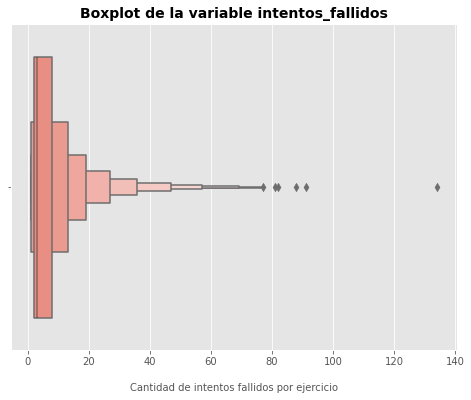

In [85]:
graficar_boxplot(df_fallidos, 'intentos_fallidos', '', 'Cantidad de intentos fallidos por ejercicio', '')

En la tabla y gráfico anteriores vemos que el 75% de la gente tiene como máximo 8 fallos en un ejercicio. 

Dado que el objetivo del presente trabajo es predecir si una persona va a desertar, buscamos establecer una cantidad de intentos fallidos que resalte los problemas de avance que está teniendo el/la estudiante, lo cual podría inducir tempranamente a una frustración, y luego a la deserción. 

In [86]:
# Verificamos cuántos ejercicios resolvieron l@s estudiantes con más de 8 intentos fallidos en algún ejercicio

df_submissions[df_submissions.submissions_count > 8].groupby('student_uid').exercise_new_id.nunique().sort_values().drop_duplicates()

student_uid
363     1
172     2
332     3
99      4
170     5
321     6
233     7
161     8
164     9
327    10
342    11
191    12
265    13
227    14
301    15
283    16
256    17
157    18
231    19
Name: exercise_new_id, dtype: int64

Efectivamente se corresponden los resultados con gente que no llegó a resolver ni la mitad del recorrido. 

Por lo tanto, la regla de decisión de esta métrica será: **si la/el estudiante tiene más de 8 intentos fallidos en algún ejercicio, suponemos que ha desertado o desertará**. Se creará una columna llamada `cond_fallos_ejer` que tendrá un 1 si de acuerdo a la regla de decisión el/la estudiante ha desertado y un 0 si no lo hace.

In [87]:
# Regla de decisión: 
q3_fallos_ejer = df_fallidos["intentos_fallidos"].quantile(0.75)

In [88]:
# Creamos la columna de deserción:
df_cond_fallos_ejer = df_fallidos.copy()[["student_uid", "intentos_fallidos"]]
df_cond_fallos_ejer["cond_fallos_ejer"] = np.where(df_fallidos["intentos_fallidos"] > q3_fallos_ejer, 1, 0)
df_cond_fallos_ejer

,student_uid,intentos_fallidos,cond_fallos_ejer
0,-1,2,0
1,-1,1,0
2,-1,2,0
3,-1,1,0
4,-1,2,0
...,...,...,...
5202,361,1,0
5203,362,3,0
5204,363,2,0
5205,363,4,0


In [89]:
df_cond_fallos_ejer = df_cond_fallos_ejer.sort_values('intentos_fallidos', ascending = False).drop_duplicates('student_uid')

In [ ]:
# Ahora nuestro dataset contiene la condicion de deserción o no según la condición "intentos fallidos por ejercicio"
df_submissions = df_submissions.merge(df_cond_fallos_ejer, on = "student_uid", how = "left")

In [96]:
df_submissions.rename(columns = {'intentos_fallidos': 'intentos_fallidos_max'}, inplace = True)
df_submissions.head()

,exercise_eid,exercise_name,expectation_results,guide_slug,result,sid,student_uid,submission_content,submission_created_at,submission_status,submissions_count,test_results,exercise_new_id,submissions_count_max,año,cuatrimestre,dia,cond_cant_ejer,cond_tiempo_ejer,intentos_fallidos_max,cond_fallos_ejer
0,1,"Funciones, declaración",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,0,76,def mitad(numero):\r\n return numero / 2,2019-08-30 13:17:17.700,passed,0,"[{'title': 'Mitad de 10 es 5', 'status': 'pass...",2,1,2019,2 cuatr.,5-Viernes,1.0,1.0,7.0,0.0
1,2,"Funciones, uso","[{'binding': 'anterior_del_triple', 'inspectio...",mumukiproject/mumuki-guia-python-funciones-tip...,NaN,1069,76,def anterior(numero):\r\n return numero - 1\r...,2019-08-30 13:40:26.023,failed,0,"[{'title': 'Anterior1 es 0', 'status': 'passed...",3,2,2019,2 cuatr.,5-Viernes,1.0,1.0,7.0,0.0
2,2,"Funciones, uso",[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,1070,76,def anterior(numero):\r\n return numero - 1\r...,2019-09-10 20:00:32.156,passed,1,"[{'title': 'Anterior1 es 0', 'status': 'passed...",3,2,2019,3 cuatr.,2-Martes,1.0,1.0,7.0,0.0
3,3,Los premios,[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,2434,76,def medalla_segun_puesto(pos):\r\n if pos == ...,2019-09-26 19:35:23.737,passed,0,"[{'title': 'Medalla segun puesto 0', 'status':...",16,1,2019,3 cuatr.,4-Jueves,1.0,1.0,7.0,0.0
4,4,¿Es par?,[],mumukiproject/mumuki-guia-python-funciones-tip...,NaN,3681,76,def es_par(numero):\r\n return numero % 0 == 0,2019-09-10 20:08:45.875,failed,0,"[{'title': 'Es par 1 es falso', 'status': 'fai...",7,2,2019,3 cuatr.,2-Martes,1.0,1.0,7.0,0.0


### **Métrica 4: Hasta qué punto del recorrido llegó cada estudiante**

En esta métrica se utiliza la variable `exercise_new_id` creada anteriormente, ya que los ejercicios se encuentran ordenados e identificados con un id único. 

In [92]:
group_envios = filtro_status[["student_uid", "exercise_new_id"]]
group_envios = group_envios.groupby(["student_uid"]).max()
group_envios.head(20) 

,exercise_new_id
student_uid,
-1,31
76,43
77,43
78,7
79,26
80,39
81,11
82,43
83,16


In [93]:
# Contamos cuántos estudiantes llegaron a cada ejercicio como máximo
estudiantes_con_ej_max = group_envios.value_counts("exercise_new_id").rename("conteo").reset_index()
estudiantes_con_ej_max

,exercise_new_id,conteo
0,43,198
1,31,7
2,7,6
3,9,5
4,16,5
5,36,4
6,2,4
7,3,4
8,6,4
9,8,4


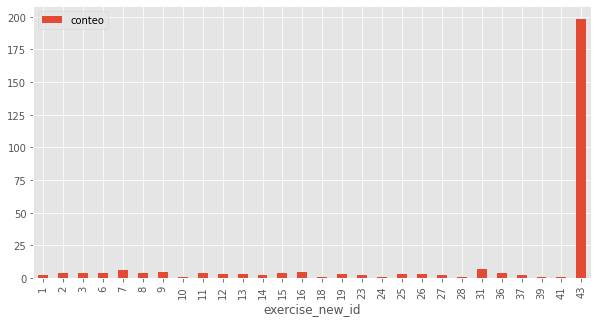

In [94]:
estudiantes_con_ej_max.sort_values("exercise_new_id").plot.bar(x = "exercise_new_id", y = "conteo", figsize = (10, 5))

Según este gráfico, 198 estudiantes resolvieron el ejercicio 43 (el último).



---



**SINTESIS DE CONCLUSIONES POR EL MOMENTO**

A grandes rasgos, y de ver todas estas métricas de forma "aislada", podríamos decir que:

* 280 de 286 estudiantes aprobaron al menos un ejercicio (registran ejercicios con estado passed o passed with warnings);

* un 50% de los estudiantes que aprobaron ejercicios, resolvieron entre 34 y 36 ejercicios (siendo esta última la cantidad máxima de ejercicios resueltos por estudiante);

* del total de estudiantes que aprobaron ejercicios, el 75% resolvió cada uno de sus ejercicios en un tiempo que como máximo llega a un día (aprox.). El valor "mediano" de tiempo promedio de resolución de cada ejercicio es aprox. 9 hs. (38% de un día).

* más allá de si un@ estudiante realizó o no el recorrido completo de ejercicios "planificados pedagógicamente", hubo 198 de 286 estudiantes que resolvieron el "último ejercicio" del recorrido ("llegaron al final");

* el 25% del total de estudiantes realizó entre 1 y 67 intentos o envíos de soluciones (siendo éstas aprobadas o no); el 50% central de los estudiantes para esta distribución (cantidad de envíos o soluciones en general), registró entre 67 y 198 intentos.

* a su vez, el 50% del total de estudiantes tuvo entre 0 y 3 intentos fallidos por ejercicio. Solo un 5% de estudiantes tuvo entre 20 y 134 fallos en algún ejercicio.







# FIN.